In [1]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria sale

In [2]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 228"
       )
tweets = query(cmd)
print(len(tweets))

10333


In [3]:
print(tweets[:20])

[('Coxo Dental Implant Contra Angle Handpiece 20:1 Reduction CX235 C6-9 CE  New  https://t.co/SQJHEQNG6X https://t.co/lErDpI1hkT',), ('Check out Dental Implant Screw Remover repair kit #Totalimplant https://t.co/5IEJBC0Umx via @eBay',), ('Check out Dental Implant Screw Remover &amp; Repair Kit #Totalimplant https://t.co/uyq2fRXVej via @eBay',), ('Check out Dental Implant Screw Remover broken screw kit #Totalimplant https://t.co/OBMoXwAiCD via @eBay',), ('Check out Dental Implant thread repair kit #Totalimplant https://t.co/h0DdOEt4Ys via @eBay',), ('Check out Dental Implant thread repair set #Totalimplant https://t.co/xDGqmaVant via @eBay',), ('Check out Dental Implant thread repair surgical kit #Totalimplant https://t.co/sVulgEoOiD via @eBay',), ('Case in point: Kid #4 needed two dental implants. All in cost varied from $7200 to $15000! I got four different ‘quotes’ #hcldr',), ('RT @ShimCode: Case in point: Kid #4 needed two dental implants. All in cost varied from $7200 to $15000! I 

# Pré-processamento

In [4]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [5]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

10333


In [6]:
for d in doc_complete[:20]:
    print(d)

coxo dental implant contra angle handpiece reduction cx c ce new 
check out dental implant screw remover repair kit totalimplant 
check out dental implant screw remover repair kit totalimplant 
check out dental implant screw remover broken screw kit totalimplant 
check out dental implant thread repair kit totalimplant 
check out dental implant thread repair set totalimplant 
check out dental implant thread repair surgical kit totalimplant 
case in point kid needed two dental implants all in cost varied from to i got four different quotes hcldr
rt case in point kid needed two dental implants all in cost varied from to i got four different quotes hcl 
check out dental implant fractured screw retrieval method kit bego bicon bti astra zimmer 
 straight titanium anatomic abutment w hex mm dental implant free ship 
super nsk s max sg dental implant reduction low speed handpiece a class 
intro to mini dental implant seminars sign up today and take off dentistry dentalhealth dentalpractice
den

In [7]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


4133.2
('insurance', 1906)
('handpiece', 1436)
('abutment', 975)
('angle', 947)
('contra', 911)
('surgical', 839)
('cost', 814)
('save', 776)
('motor', 743)
('reduction', 720)
('check', 664)
('speed', 625)
('screw', 580)
('bone', 503)
('surgery', 500)
('sales', 484)
('system', 475)
('money', 456)
('straight', 452)
('best', 447)
('rica', 432)
('costa', 432)
('sponsored', 426)
('idea', 422)
('affordable', 388)
('brushless', 382)
('sale', 372)
('surprise', 361)
('listings', 360)
('getting', 358)


In [8]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['coxo', 'contra', 'angle', 'handpiece', 'reduction']
['check', 'screw', 'remover', 'repair', 'totalimplant']
['check', 'screw', 'remover', 'repair', 'totalimplant']
['check', 'screw', 'remover', 'broken', 'screw', 'totalimplant']
['check', 'thread', 'repair', 'totalimplant']
['check', 'thread', 'repair', 'totalimplant']
['check', 'thread', 'repair', 'surgical', 'totalimplant']
['case', 'point', 'needed', 'cost', 'varied', 'four', 'different', 'quotes', 'hcldr']
['case', 'point', 'needed', 'cost', 'varied', 'four', 'different', 'quotes']
['check', 'fractured', 'screw', 'retrieval', 'method', 'bego', 'bicon', 'astra', 'zimmer']
['straight', 'titanium', 'anatomic', 'abutment', 'free', 'ship']
['super', 'reduction', 'speed', 'handpiece', 'class']
['intro', 'mini', 'seminars', 'sign', 'today', 'take', 'dentistry', 'dentalhealth', 'dentalpractice']
['chip', 'screw', 'part']
['fortis', 'straight', 'abutment', 'healing', 'package', 'deal']
['fortis', 'straight', 'abutment', 'healing', 'packag

# Topic Modeling

In [9]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [10]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [11]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [12]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [13]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [14]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [15]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [16]:
dtm

<10333x4582 sparse matrix of type '<class 'numpy.int32'>'
	with 54512 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [17]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

ks

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]

In [18]:
eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_topics: 40
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 10
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:n_topics: 80
INFO:lda:n_topics: 20
INFO:lda:n_topics: 50
INFO:lda:n_topics: 70
INFO:lda:n_topics: 90
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 60
INFO:lda:n_words: 55

INFO:lda:<30> log likelihood: -317083
INFO:lda:<20> log likelihood: -322478
INFO:lda:<60> log likelihood: -322197
INFO:lda:<30> log likelihood: -312551
INFO:lda:<30> log likelihood: -309690
INFO:lda:<20> log likelihood: -321756
INFO:lda:<40> log likelihood: -315282
INFO:lda:<20> log likelihood: -322673
INFO:lda:<20> log likelihood: -321659
INFO:lda:<70> log likelihood: -321636
INFO:lda:<50> log likelihood: -313372
INFO:lda:<20> log likelihood: -322374
INFO:lda:<40> log likelihood: -308264
INFO:lda:<10> log likelihood: -350115
INFO:lda:<80> log likelihood: -321164
INFO:lda:<40> log likelihood: -306686
INFO:lda:<30> log likelihood: -312222
INFO:lda:<60> log likelihood: -311479
INFO:lda:<10> log likelihood: -353228
INFO:lda:<30> log likelihood: -312463
INFO:lda:<90> log likelihood: -320445
INFO:lda:<10> log likelihood: -353195
INFO:lda:<10> log likelihood: -354631
INFO:lda:<50> log likelihood: -306020
INFO:lda:<100> log likelihood: -320196
INFO:lda:<20> log likelihood: -323133
INFO:lda:<7

INFO:lda:<250> log likelihood: -301178
INFO:lda:<480> log likelihood: -318168
INFO:lda:<340> log likelihood: -303069
INFO:lda:<200> log likelihood: -297454
INFO:lda:<160> log likelihood: -296464
INFO:lda:<100> log likelihood: -297355
INFO:lda:<220> log likelihood: -297808
INFO:lda:<100> log likelihood: -297639
INFO:lda:<490> log likelihood: -318252
INFO:lda:<350> log likelihood: -303127
INFO:lda:<260> log likelihood: -300917
INFO:lda:<210> log likelihood: -296807
INFO:lda:<500> log likelihood: -318027
INFO:lda:<150> log likelihood: -295428
INFO:lda:<360> log likelihood: -303058
INFO:lda:<230> log likelihood: -297753
INFO:lda:<130> log likelihood: -295479
INFO:lda:<270> log likelihood: -300923
INFO:lda:<170> log likelihood: -296173
INFO:lda:<370> log likelihood: -303280
INFO:lda:<510> log likelihood: -317922
INFO:lda:<60> log likelihood: -306573
INFO:lda:<220> log likelihood: -296727
INFO:lda:<50> log likelihood: -312508
INFO:lda:<520> log likelihood: -317726
INFO:lda:<80> log likelihoo

INFO:lda:<640> log likelihood: -302671
INFO:lda:<920> log likelihood: -317130
INFO:lda:<270> log likelihood: -293382
INFO:lda:<480> log likelihood: -300387
INFO:lda:<930> log likelihood: -317367
INFO:lda:<290> log likelihood: -295003
INFO:lda:<370> log likelihood: -295724
INFO:lda:<650> log likelihood: -302593
INFO:lda:<180> log likelihood: -294327
INFO:lda:<220> log likelihood: -294291
INFO:lda:<940> log likelihood: -316925
INFO:lda:<100> log likelihood: -303059
INFO:lda:<660> log likelihood: -302796
INFO:lda:<410> log likelihood: -296728
INFO:lda:<110> log likelihood: -299044
INFO:lda:<950> log likelihood: -317056
INFO:lda:<490> log likelihood: -300196
INFO:lda:<280> log likelihood: -293041
INFO:lda:<380> log likelihood: -295924
INFO:lda:<960> log likelihood: -317074
INFO:lda:<670> log likelihood: -302701
INFO:lda:<300> log likelihood: -294626
INFO:lda:<200> log likelihood: -294470
INFO:lda:<500> log likelihood: -300068
INFO:lda:<970> log likelihood: -317121
INFO:lda:<420> log likeli

INFO:lda:<580> log likelihood: -296876
INFO:lda:<1350> log likelihood: -316801
INFO:lda:<180> log likelihood: -295167
INFO:lda:<710> log likelihood: -299878
INFO:lda:<950> log likelihood: -302921
INFO:lda:<210> log likelihood: -295124
INFO:lda:<530> log likelihood: -294730
INFO:lda:<280> log likelihood: -293001
INFO:lda:<160> log likelihood: -296829
INFO:lda:<1360> log likelihood: -317248
INFO:lda:<410> log likelihood: -292928
INFO:lda:<960> log likelihood: -302686
INFO:lda:<430> log likelihood: -294285
INFO:lda:<320> log likelihood: -293249
INFO:lda:<590> log likelihood: -296877
INFO:lda:<1370> log likelihood: -316726
INFO:lda:<720> log likelihood: -299897
INFO:lda:<970> log likelihood: -302605
INFO:lda:<1380> log likelihood: -316872
INFO:lda:<540> log likelihood: -294473
INFO:lda:<270> log likelihood: -293017
INFO:lda:<730> log likelihood: -299602
INFO:lda:<600> log likelihood: -296657
INFO:lda:<980> log likelihood: -302649
INFO:lda:<1390> log likelihood: -317031
INFO:lda:<440> log l

INFO:lda:<280> log likelihood: -293897
INFO:lda:<560> log likelihood: -293776
INFO:lda:<520> log likelihood: -292288
INFO:lda:<1780> log likelihood: -316851
INFO:lda:<370> log likelihood: -292682
INFO:lda:<1260> log likelihood: -302655
INFO:lda:<770> log likelihood: -296529
INFO:lda:<950> log likelihood: -299841
INFO:lda:<1790> log likelihood: -316786
INFO:lda:<1270> log likelihood: -302790
INFO:lda:<190> log likelihood: -297814
INFO:lda:<680> log likelihood: -294503
INFO:lda:<1800> log likelihood: -317000
INFO:lda:<210> log likelihood: -295600
INFO:lda:<570> log likelihood: -293502
INFO:lda:<960> log likelihood: -299791
INFO:lda:<780> log likelihood: -296756
INFO:lda:<1280> log likelihood: -302446
INFO:lda:<1810> log likelihood: -317008
INFO:lda:<420> log likelihood: -292743
INFO:lda:<1820> log likelihood: -316964
INFO:lda:<350> log likelihood: -291722
INFO:lda:<530> log likelihood: -292873
INFO:lda:<1290> log likelihood: -302540
INFO:lda:<240> log likelihood: -294413
INFO:lda:<380> l

INFO:lda:<430> log likelihood: -291907
INFO:lda:<960> log likelihood: -296428
INFO:lda:<1200> log likelihood: -299362
INFO:lda:<1590> log likelihood: -302558
INFO:lda:<700> log likelihood: -293119
INFO:lda:<860> log likelihood: -294061
INFO:lda:<650> log likelihood: -292108
INFO:lda:<1600> log likelihood: -302439
INFO:lda:<1210> log likelihood: -299319
INFO:lda:<970> log likelihood: -296289
INFO:lda:<530> log likelihood: -292409
INFO:lda:<360> log likelihood: -292863
INFO:lda:<210> log likelihood: -298634
INFO:lda:<470> log likelihood: -291431
INFO:lda:<1610> log likelihood: -302440
INFO:lda:<300> log likelihood: -293144
INFO:lda:<870> log likelihood: -293857
INFO:lda:<1220> log likelihood: -299687
INFO:lda:<240> log likelihood: -296774
INFO:lda:<980> log likelihood: -296479
INFO:lda:<710> log likelihood: -293418
INFO:lda:<660> log likelihood: -291817
INFO:lda:<440> log likelihood: -292053
INFO:lda:<1620> log likelihood: -302456
INFO:lda:<1230> log likelihood: -299739
INFO:lda:<270> lo

INFO:lda:<650> log likelihood: -291957
INFO:lda:<1050> log likelihood: -294343
INFO:lda:<1950> log likelihood: -302446
INFO:lda:<370> log likelihood: -292537
INFO:lda:<800> log likelihood: -291907
INFO:lda:<1500> log likelihood: -299679
INFO:lda:<580> log likelihood: -291599
INFO:lda:<1960> log likelihood: -302661
INFO:lda:<1200> log likelihood: -295926
INFO:lda:<870> log likelihood: -292746
INFO:lda:<330> log likelihood: -293960
INFO:lda:<1060> log likelihood: -293933
INFO:lda:<1510> log likelihood: -299594
INFO:lda:<1970> log likelihood: -302304
INFO:lda:<540> log likelihood: -290904
INFO:lda:<1210> log likelihood: -295810
INFO:lda:<660> log likelihood: -292028
INFO:lda:<260> log likelihood: -297100
INFO:lda:<810> log likelihood: -291918
INFO:lda:<1520> log likelihood: -299085
INFO:lda:<1980> log likelihood: -302467
INFO:lda:<450> log likelihood: -292023
INFO:lda:<880> log likelihood: -292985
INFO:lda:<1070> log likelihood: -293948
INFO:lda:<590> log likelihood: -291477
INFO:lda:<122

INFO:lda:<1840> log likelihood: -299594
INFO:lda:<1470> log likelihood: -296076
INFO:lda:<1050> log likelihood: -292812
INFO:lda:<400> log likelihood: -292937
INFO:lda:<540> log likelihood: -291113
INFO:lda:<710> log likelihood: -291667
INFO:lda:<1850> log likelihood: -299544
INFO:lda:<800> log likelihood: -291514
INFO:lda:<1480> log likelihood: -296129
INFO:lda:<1280> log likelihood: -294317
INFO:lda:<1860> log likelihood: -299398
INFO:lda:<660> log likelihood: -291333
INFO:lda:<1060> log likelihood: -292852
INFO:lda:<460> log likelihood: -292545
INFO:lda:<970> log likelihood: -291394
INFO:lda:<1490> log likelihood: -296045
INFO:lda:<1870> log likelihood: -299737
INFO:lda:<1290> log likelihood: -293996
INFO:lda:<810> log likelihood: -291805
INFO:lda:<720> log likelihood: -291213
INFO:lda:<1880> log likelihood: -299378
INFO:lda:<1070> log likelihood: -292947
INFO:lda:<1500> log likelihood: -295937
INFO:lda:<980> log likelihood: -291764
INFO:lda:<360> log likelihood: -294826
INFO:lda:<5

INFO:lda:<960> log likelihood: -291632
INFO:lda:<1260> log likelihood: -292878
INFO:lda:<480> log likelihood: -293397
INFO:lda:<1790> log likelihood: -296195
INFO:lda:<1550> log likelihood: -293842
INFO:lda:<1150> log likelihood: -291763
INFO:lda:<560> log likelihood: -291991
INFO:lda:<1270> log likelihood: -292676
INFO:lda:<1800> log likelihood: -296051
INFO:lda:<860> log likelihood: -291411
INFO:lda:<650> log likelihood: -291032
INFO:lda:<970> log likelihood: -291508
INFO:lda:<800> log likelihood: -290547
INFO:lda:<1560> log likelihood: -293415
INFO:lda:<1160> log likelihood: -291146
INFO:lda:<1810> log likelihood: -296159
INFO:lda:<380> log likelihood: -296256
INFO:lda:<1280> log likelihood: -293074
INFO:lda:<1570> log likelihood: -293542
INFO:lda:<430> log likelihood: -293554
INFO:lda:<1820> log likelihood: -296198
INFO:lda:<1170> log likelihood: -291447
INFO:lda:<570> log likelihood: -291913
INFO:lda:<980> log likelihood: -291336
INFO:lda:<870> log likelihood: -290954
INFO:lda:<49

INFO:lda:<1370> log likelihood: -291601
INFO:lda:<1030> log likelihood: -290937
INFO:lda:<770> log likelihood: -290576
INFO:lda:<680> log likelihood: -292059
INFO:lda:<950> log likelihood: -290577
INFO:lda:<1160> log likelihood: -291393
INFO:lda:<1850> log likelihood: -293639
INFO:lda:<1520> log likelihood: -292389
INFO:lda:<510> log likelihood: -293302
INFO:lda:<1380> log likelihood: -291298
INFO:lda:<1860> log likelihood: -293924
INFO:lda:<960> log likelihood: -290468
INFO:lda:<1040> log likelihood: -291058
INFO:lda:<580> log likelihood: -292351
INFO:lda:<1170> log likelihood: -291431
INFO:lda:<1530> log likelihood: -292501
INFO:lda:<1870> log likelihood: -294001
INFO:lda:<780> log likelihood: -291040
INFO:lda:<1390> log likelihood: -291392
INFO:lda:<690> log likelihood: -291949
INFO:lda:<1540> log likelihood: -292497
INFO:lda:<1180> log likelihood: -291547
INFO:lda:<460> log likelihood: -295949
INFO:lda:<1880> log likelihood: -294032
INFO:lda:<1050> log likelihood: -290876
INFO:lda:

INFO:lda:<1240> log likelihood: -290767
INFO:lda:<610> log likelihood: -292565
INFO:lda:<690> log likelihood: -292368
INFO:lda:<1400> log likelihood: -291034
INFO:lda:<1840> log likelihood: -292789
INFO:lda:<1650> log likelihood: -291325
INFO:lda:<820> log likelihood: -291330
INFO:lda:<1250> log likelihood: -290592
INFO:lda:<930> log likelihood: -290638
INFO:lda:<1150> log likelihood: -290163
INFO:lda:<1850> log likelihood: -292328
INFO:lda:<1410> log likelihood: -291129
INFO:lda:<1660> log likelihood: -291355
INFO:lda:<1860> log likelihood: -292706
INFO:lda:<550> log likelihood: -295588
INFO:lda:<700> log likelihood: -292113
INFO:lda:<1260> log likelihood: -290660
INFO:lda:<1420> log likelihood: -290900
INFO:lda:<1160> log likelihood: -290210
INFO:lda:<1670> log likelihood: -291630
INFO:lda:<620> log likelihood: -292485
INFO:lda:<940> log likelihood: -290237
INFO:lda:<830> log likelihood: -291629
INFO:lda:<1870> log likelihood: -292884
INFO:lda:<1270> log likelihood: -290911
INFO:lda:

INFO:lda:<1680> log likelihood: -291075
INFO:lda:<980> log likelihood: -291429
INFO:lda:<830> log likelihood: -291346
INFO:lda:<1980> log likelihood: -291252
INFO:lda:<1510> log likelihood: -290703
INFO:lda:<1690> log likelihood: -291199
INFO:lda:<1380> log likelihood: -289918
INFO:lda:<1120> log likelihood: -290202
INFO:lda:<1990> log likelihood: -291295
INFO:lda:<990> log likelihood: -291224
INFO:lda:<1700> log likelihood: -291234
INFO:lda:<740> log likelihood: -292591
INFO:lda:<1520> log likelihood: -290456
INFO:lda:<1999> log likelihood: -291107
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -291294.700246
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.046051
INFO:lda:<1390> log likelihood: -290092
INFO:lda:<660> log likelihood: -294817
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 176.624018
INFO:lda:<840> log likelihood: -291474
INFO:lda:<1130> log likelihood: -290681
INFO:lda:<1710> log likelihood: -291232
INFO:lda:<1530> log lik

INFO:lda:<1840> log likelihood: -290729
INFO:lda:<1680> log likelihood: -290218
INFO:lda:<1850> log likelihood: -290446
INFO:lda:<1370> log likelihood: -290095
INFO:lda:<1200> log likelihood: -290808
INFO:lda:<800> log likelihood: -294442
INFO:lda:<900> log likelihood: -291860
INFO:lda:<1020> log likelihood: -291736
INFO:lda:<1690> log likelihood: -290109
INFO:lda:<1860> log likelihood: -290344
INFO:lda:<1380> log likelihood: -289654
INFO:lda:<1210> log likelihood: -290917
INFO:lda:<1870> log likelihood: -290360
INFO:lda:<1700> log likelihood: -290015
INFO:lda:<1030> log likelihood: -291791
INFO:lda:<910> log likelihood: -292174
INFO:lda:<810> log likelihood: -294549
INFO:lda:<1390> log likelihood: -289795
INFO:lda:<1880> log likelihood: -290479
INFO:lda:<1220> log likelihood: -291441
INFO:lda:<1710> log likelihood: -290155
INFO:lda:<1890> log likelihood: -290248
INFO:lda:<1400> log likelihood: -289816
INFO:lda:<1040> log likelihood: -291347
INFO:lda:<1720> log likelihood: -290137
INFO

INFO:lda:<1140> log likelihood: -291681
INFO:lda:<1020> log likelihood: -293598
INFO:lda:<1750> log likelihood: -289739
INFO:lda:<1530> log likelihood: -290679
INFO:lda:<1300> log likelihood: -291134
INFO:lda:<1150> log likelihood: -291504
INFO:lda:<1760> log likelihood: -289478
INFO:lda:<1540> log likelihood: -290720
INFO:lda:<1310> log likelihood: -291332
INFO:lda:<1030> log likelihood: -294283
INFO:lda:<1770> log likelihood: -289821
INFO:lda:<1550> log likelihood: -290879
INFO:lda:<1160> log likelihood: -291625
INFO:lda:<1320> log likelihood: -290953
INFO:lda:<1780> log likelihood: -290104
INFO:lda:<1040> log likelihood: -293725
INFO:lda:<1560> log likelihood: -290340
INFO:lda:<1790> log likelihood: -289829
INFO:lda:<1170> log likelihood: -291411
INFO:lda:<1330> log likelihood: -291457
INFO:lda:<1570> log likelihood: -290328
INFO:lda:<1800> log likelihood: -290035
INFO:lda:<1050> log likelihood: -293548
INFO:lda:<1340> log likelihood: -291077
INFO:lda:<1180> log likelihood: -291524


INFO:lda:<1750> log likelihood: -290970
INFO:lda:<1540> log likelihood: -290665
INFO:lda:<1370> log likelihood: -292887
INFO:lda:<1760> log likelihood: -290780
INFO:lda:<1550> log likelihood: -291148
INFO:lda:<1380> log likelihood: -293091
INFO:lda:<1770> log likelihood: -290775
INFO:lda:<1560> log likelihood: -291175
INFO:lda:<1390> log likelihood: -293020
INFO:lda:<1780> log likelihood: -291039
INFO:lda:<1570> log likelihood: -291364
INFO:lda:<1790> log likelihood: -291116
INFO:lda:<1400> log likelihood: -292884
INFO:lda:<1580> log likelihood: -291669
INFO:lda:<1800> log likelihood: -291414
INFO:lda:<1410> log likelihood: -292988
INFO:lda:<1590> log likelihood: -291291
INFO:lda:<1810> log likelihood: -291054
INFO:lda:<1420> log likelihood: -292979
INFO:lda:<1600> log likelihood: -290717
INFO:lda:<1820> log likelihood: -290485
INFO:lda:<1830> log likelihood: -290720
INFO:lda:<1430> log likelihood: -293373
INFO:lda:<1610> log likelihood: -290987
INFO:lda:<1840> log likelihood: -291083


plotting evaluation results


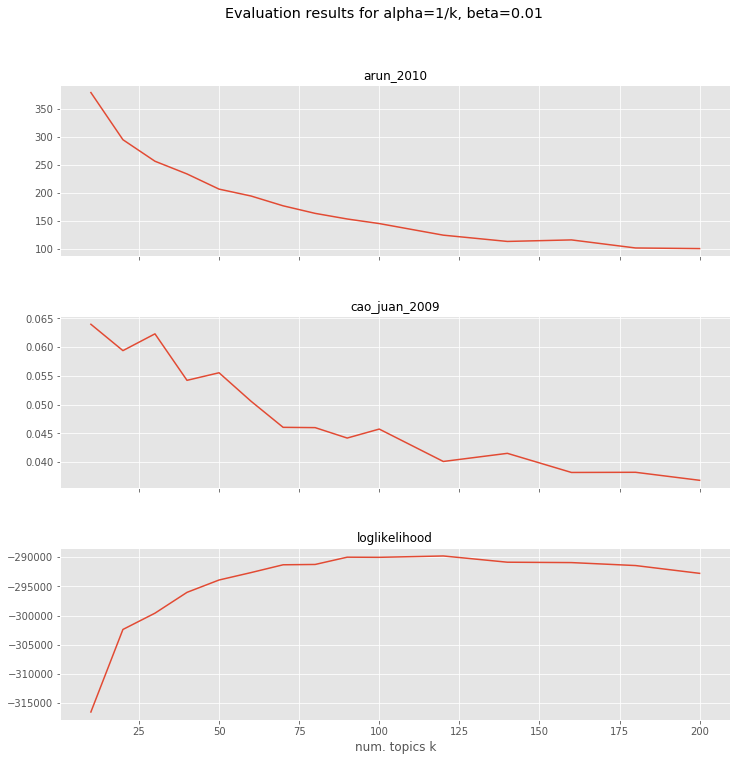

In [19]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()



### alpha: 1/k beta: 0,1

In [20]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20)) 
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 10
INFO:lda:vocab_size: 4582
INFO:lda:n_topics: 20
INFO:lda:vocab_size: 4582
INFO:lda:n_iter: 2000
INFO:lda:n_words: 55386
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 30
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 40
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_topics: 80
INFO:lda:n_words: 55386
INFO:lda:n_iter: 200

INFO:lda:<40> log likelihood: -321853
INFO:lda:<10> log likelihood: -391438
INFO:lda:<60> log likelihood: -323657
INFO:lda:<10> log likelihood: -393044
INFO:lda:<20> log likelihood: -344623
INFO:lda:<20> log likelihood: -349039
INFO:lda:<70> log likelihood: -323607
INFO:lda:<40> log likelihood: -325125
INFO:lda:<50> log likelihood: -319881
INFO:lda:<30> log likelihood: -329656
INFO:lda:<20> log likelihood: -355982
INFO:lda:<10> log likelihood: -399466
INFO:lda:<80> log likelihood: -323270
INFO:lda:<10> log likelihood: -406429
INFO:lda:<60> log likelihood: -319111
INFO:lda:<50> log likelihood: -322770
INFO:lda:<90> log likelihood: -323222
INFO:lda:<30> log likelihood: -333955
INFO:lda:<40> log likelihood: -324657
INFO:lda:<20> log likelihood: -356636
INFO:lda:<70> log likelihood: -318522
INFO:lda:<100> log likelihood: -323425
INFO:lda:<30> log likelihood: -338033
INFO:lda:<10> log likelihood: -413023
INFO:lda:<60> log likelihood: -320806
INFO:lda:<20> log likelihood: -362392
INFO:lda:<1

INFO:lda:<510> log likelihood: -319754
INFO:lda:<270> log likelihood: -315868
INFO:lda:<350> log likelihood: -315887
INFO:lda:<130> log likelihood: -325228
INFO:lda:<520> log likelihood: -319758
INFO:lda:<150> log likelihood: -320717
INFO:lda:<220> log likelihood: -315111
INFO:lda:<360> log likelihood: -315796
INFO:lda:<530> log likelihood: -319814
INFO:lda:<280> log likelihood: -315753
INFO:lda:<180> log likelihood: -317471
INFO:lda:<540> log likelihood: -319498
INFO:lda:<120> log likelihood: -325389
INFO:lda:<50> log likelihood: -357167
INFO:lda:<370> log likelihood: -315861
INFO:lda:<230> log likelihood: -315205
INFO:lda:<290> log likelihood: -315694
INFO:lda:<550> log likelihood: -319510
INFO:lda:<140> log likelihood: -324445
INFO:lda:<380> log likelihood: -316068
INFO:lda:<80> log likelihood: -340247
INFO:lda:<160> log likelihood: -319858
INFO:lda:<110> log likelihood: -329424
INFO:lda:<100> log likelihood: -331631
INFO:lda:<560> log likelihood: -319730
INFO:lda:<190> log likeliho

INFO:lda:<510> log likelihood: -315172
INFO:lda:<140> log likelihood: -334198
INFO:lda:<670> log likelihood: -315596
INFO:lda:<970> log likelihood: -319819
INFO:lda:<90> log likelihood: -347075
INFO:lda:<280> log likelihood: -318072
INFO:lda:<980> log likelihood: -319579
INFO:lda:<80> log likelihood: -353484
INFO:lda:<520> log likelihood: -315074
INFO:lda:<330> log likelihood: -316286
INFO:lda:<680> log likelihood: -316018
INFO:lda:<410> log likelihood: -315091
INFO:lda:<990> log likelihood: -319611
INFO:lda:<250> log likelihood: -321073
INFO:lda:<120> log likelihood: -336503
INFO:lda:<690> log likelihood: -315774
INFO:lda:<220> log likelihood: -321083
INFO:lda:<1000> log likelihood: -319743
INFO:lda:<530> log likelihood: -315449
INFO:lda:<290> log likelihood: -318325
INFO:lda:<1010> log likelihood: -319746
INFO:lda:<420> log likelihood: -314854
INFO:lda:<180> log likelihood: -327350
INFO:lda:<700> log likelihood: -315903
INFO:lda:<200> log likelihood: -325585
INFO:lda:<340> log likeli

INFO:lda:<750> log likelihood: -314097
INFO:lda:<590> log likelihood: -314601
INFO:lda:<1420> log likelihood: -319355
INFO:lda:<980> log likelihood: -315678
INFO:lda:<360> log likelihood: -319943
INFO:lda:<480> log likelihood: -316469
INFO:lda:<1430> log likelihood: -319740
INFO:lda:<280> log likelihood: -324776
INFO:lda:<760> log likelihood: -313991
INFO:lda:<150> log likelihood: -338503
INFO:lda:<990> log likelihood: -315622
INFO:lda:<1440> log likelihood: -319665
INFO:lda:<600> log likelihood: -314658
INFO:lda:<420> log likelihood: -316758
INFO:lda:<1450> log likelihood: -319676
INFO:lda:<210> log likelihood: -330034
INFO:lda:<1000> log likelihood: -315502
INFO:lda:<320> log likelihood: -320919
INFO:lda:<770> log likelihood: -314209
INFO:lda:<490> log likelihood: -316704
INFO:lda:<260> log likelihood: -325607
INFO:lda:<1460> log likelihood: -319711
INFO:lda:<610> log likelihood: -315288
INFO:lda:<370> log likelihood: -320219
INFO:lda:<1010> log likelihood: -315675
INFO:lda:<120> log

INFO:lda:<330> log likelihood: -324606
INFO:lda:<630> log likelihood: -316325
INFO:lda:<270> log likelihood: -328542
INFO:lda:<1870> log likelihood: -319791
INFO:lda:<410> log likelihood: -320817
INFO:lda:<780> log likelihood: -314438
INFO:lda:<1300> log likelihood: -315911
INFO:lda:<1880> log likelihood: -319348
INFO:lda:<550> log likelihood: -316857
INFO:lda:<990> log likelihood: -313855
INFO:lda:<1890> log likelihood: -319323
INFO:lda:<230> log likelihood: -331895
INFO:lda:<1310> log likelihood: -315698
INFO:lda:<640> log likelihood: -316451
INFO:lda:<480> log likelihood: -319904
INFO:lda:<1900> log likelihood: -319445
INFO:lda:<790> log likelihood: -314493
INFO:lda:<1000> log likelihood: -314323
INFO:lda:<200> log likelihood: -335694
INFO:lda:<1320> log likelihood: -315423
INFO:lda:<1910> log likelihood: -319207
INFO:lda:<370> log likelihood: -323262
INFO:lda:<1920> log likelihood: -319430
INFO:lda:<560> log likelihood: -316944
INFO:lda:<420> log likelihood: -320716
INFO:lda:<180> 

INFO:lda:<1650> log likelihood: -315825
INFO:lda:<1250> log likelihood: -313657
INFO:lda:<290> log likelihood: -330178
INFO:lda:<460> log likelihood: -322649
INFO:lda:<810> log likelihood: -316203
INFO:lda:<1660> log likelihood: -315473
INFO:lda:<1260> log likelihood: -313972
INFO:lda:<1000> log likelihood: -314377
INFO:lda:<610> log likelihood: -319315
INFO:lda:<1670> log likelihood: -315660
INFO:lda:<350> log likelihood: -327838
INFO:lda:<200> log likelihood: -340607
INFO:lda:<700> log likelihood: -316509
INFO:lda:<530> log likelihood: -320401
INFO:lda:<1270> log likelihood: -313793
INFO:lda:<820> log likelihood: -315818
INFO:lda:<1680> log likelihood: -315510
INFO:lda:<1010> log likelihood: -314107
INFO:lda:<430> log likelihood: -324280
INFO:lda:<1280> log likelihood: -314482
INFO:lda:<1690> log likelihood: -315741
INFO:lda:<470> log likelihood: -322391
INFO:lda:<620> log likelihood: -319274
INFO:lda:<1700> log likelihood: -315262
INFO:lda:<830> log likelihood: -315843
INFO:lda:<710

INFO:lda:<520> log likelihood: -323356
INFO:lda:<430> log likelihood: -327882
INFO:lda:<1550> log likelihood: -314192
INFO:lda:<1000> log likelihood: -316000
INFO:lda:<650> log likelihood: -320318
INFO:lda:<570> log likelihood: -321580
INFO:lda:<750> log likelihood: -319115
INFO:lda:<860> log likelihood: -316406
INFO:lda:<280> log likelihood: -337434
INFO:lda:<1560> log likelihood: -313922
INFO:lda:<1240> log likelihood: -313937
INFO:lda:<1010> log likelihood: -315644
INFO:lda:<1570> log likelihood: -314003
INFO:lda:<1250> log likelihood: -313823
INFO:lda:<870> log likelihood: -316072
INFO:lda:<760> log likelihood: -319544
INFO:lda:<1580> log likelihood: -314154
INFO:lda:<660> log likelihood: -320083
INFO:lda:<1020> log likelihood: -315473
INFO:lda:<530> log likelihood: -323652
INFO:lda:<250> log likelihood: -338940
INFO:lda:<580> log likelihood: -321334
INFO:lda:<1260> log likelihood: -314488
INFO:lda:<440> log likelihood: -327884
INFO:lda:<320> log likelihood: -333368
INFO:lda:<1590>

INFO:lda:<1920> log likelihood: -313858
INFO:lda:<1510> log likelihood: -314502
INFO:lda:<530> log likelihood: -327471
INFO:lda:<1060> log likelihood: -316023
INFO:lda:<800> log likelihood: -319547
INFO:lda:<1250> log likelihood: -315499
INFO:lda:<1930> log likelihood: -314267
INFO:lda:<390> log likelihood: -332044
INFO:lda:<1520> log likelihood: -313966
INFO:lda:<710> log likelihood: -321854
INFO:lda:<930> log likelihood: -319173
INFO:lda:<1940> log likelihood: -313853
INFO:lda:<1070> log likelihood: -316122
INFO:lda:<1260> log likelihood: -315587
INFO:lda:<650> log likelihood: -324472
INFO:lda:<1530> log likelihood: -313829
INFO:lda:<1950> log likelihood: -313879
INFO:lda:<810> log likelihood: -319851
INFO:lda:<1540> log likelihood: -314293
INFO:lda:<1960> log likelihood: -313470
INFO:lda:<1270> log likelihood: -315687
INFO:lda:<540> log likelihood: -327114
INFO:lda:<1080> log likelihood: -316437
INFO:lda:<460> log likelihood: -329361
INFO:lda:<940> log likelihood: -318950
INFO:lda:<

INFO:lda:<1120> log likelihood: -318653
INFO:lda:<970> log likelihood: -319961
INFO:lda:<1850> log likelihood: -314317
INFO:lda:<860> log likelihood: -321524
INFO:lda:<1520> log likelihood: -315415
INFO:lda:<420> log likelihood: -334565
INFO:lda:<790> log likelihood: -323642
INFO:lda:<1300> log likelihood: -316148
INFO:lda:<1860> log likelihood: -314176
INFO:lda:<370> log likelihood: -336954
INFO:lda:<550> log likelihood: -328948
INFO:lda:<1130> log likelihood: -318822
INFO:lda:<650> log likelihood: -327380
INFO:lda:<1530> log likelihood: -315896
INFO:lda:<1870> log likelihood: -314304
INFO:lda:<980> log likelihood: -319575
INFO:lda:<1310> log likelihood: -315901
INFO:lda:<870> log likelihood: -321176
INFO:lda:<1880> log likelihood: -314006
INFO:lda:<1140> log likelihood: -318796
INFO:lda:<1540> log likelihood: -315682
INFO:lda:<480> log likelihood: -331355
INFO:lda:<800> log likelihood: -323421
INFO:lda:<1890> log likelihood: -314020
INFO:lda:<1320> log likelihood: -315390
INFO:lda:<9

INFO:lda:<660> log likelihood: -328536
INFO:lda:<1040> log likelihood: -321388
INFO:lda:<1350> log likelihood: -318745
INFO:lda:<570> log likelihood: -331074
INFO:lda:<950> log likelihood: -323440
INFO:lda:<1170> log likelihood: -319482
INFO:lda:<1570> log likelihood: -315659
INFO:lda:<1840> log likelihood: -315465
INFO:lda:<780> log likelihood: -326599
INFO:lda:<1360> log likelihood: -318757
INFO:lda:<1850> log likelihood: -315708
INFO:lda:<1050> log likelihood: -321364
INFO:lda:<1580> log likelihood: -316200
INFO:lda:<1180> log likelihood: -319552
INFO:lda:<960> log likelihood: -324027
INFO:lda:<1860> log likelihood: -315524
INFO:lda:<510> log likelihood: -333031
INFO:lda:<670> log likelihood: -328250
INFO:lda:<1370> log likelihood: -318775
INFO:lda:<1590> log likelihood: -315426
INFO:lda:<1870> log likelihood: -315992
INFO:lda:<580> log likelihood: -331271
INFO:lda:<1060> log likelihood: -321450
INFO:lda:<1190> log likelihood: -319189
INFO:lda:<450> log likelihood: -335959
INFO:lda:

INFO:lda:<1250> log likelihood: -321133
INFO:lda:<790> log likelihood: -328005
INFO:lda:<1140> log likelihood: -323277
INFO:lda:<1890> log likelihood: -315622
INFO:lda:<1630> log likelihood: -318670
INFO:lda:<1410> log likelihood: -318966
INFO:lda:<1260> log likelihood: -321277
INFO:lda:<690> log likelihood: -331284
INFO:lda:<940> log likelihood: -326136
INFO:lda:<1900> log likelihood: -315293
INFO:lda:<610> log likelihood: -332615
INFO:lda:<1150> log likelihood: -323890
INFO:lda:<1640> log likelihood: -318820
INFO:lda:<800> log likelihood: -328055
INFO:lda:<1420> log likelihood: -319089
INFO:lda:<1910> log likelihood: -315732
INFO:lda:<1270> log likelihood: -321008
INFO:lda:<1650> log likelihood: -318844
INFO:lda:<540> log likelihood: -334935
INFO:lda:<950> log likelihood: -326399
INFO:lda:<1160> log likelihood: -323287
INFO:lda:<1920> log likelihood: -315919
INFO:lda:<1430> log likelihood: -319064
INFO:lda:<1660> log likelihood: -318664
INFO:lda:<700> log likelihood: -330912
INFO:lda

INFO:lda:<1970> log likelihood: -318600
INFO:lda:<1130> log likelihood: -325586
INFO:lda:<830> log likelihood: -331093
INFO:lda:<1700> log likelihood: -319148
INFO:lda:<960> log likelihood: -327999
INFO:lda:<1520> log likelihood: -320828
INFO:lda:<1390> log likelihood: -323657
INFO:lda:<1980> log likelihood: -318868
INFO:lda:<1710> log likelihood: -319255
INFO:lda:<1140> log likelihood: -326164
INFO:lda:<1990> log likelihood: -318441
INFO:lda:<1530> log likelihood: -320772
INFO:lda:<1400> log likelihood: -323143
INFO:lda:<740> log likelihood: -331843
INFO:lda:<650> log likelihood: -335203
INFO:lda:<970> log likelihood: -327927
INFO:lda:<840> log likelihood: -330603
INFO:lda:<1720> log likelihood: -319258
INFO:lda:<1999> log likelihood: -318690
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -318441.118739
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.051326
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 237.728086
INFO:lda:<1540> log lik

INFO:lda:<1860> log likelihood: -320837
INFO:lda:<1020> log likelihood: -330615
INFO:lda:<1380> log likelihood: -325713
INFO:lda:<1690> log likelihood: -323392
INFO:lda:<1870> log likelihood: -321347
INFO:lda:<1180> log likelihood: -328008
INFO:lda:<1700> log likelihood: -323481
INFO:lda:<790> log likelihood: -334305
INFO:lda:<1390> log likelihood: -325961
INFO:lda:<900> log likelihood: -332247
INFO:lda:<1880> log likelihood: -320951
INFO:lda:<1030> log likelihood: -330735
INFO:lda:<1710> log likelihood: -323928
INFO:lda:<1190> log likelihood: -328128
INFO:lda:<1400> log likelihood: -325601
INFO:lda:<1890> log likelihood: -321039
INFO:lda:<1720> log likelihood: -323848
INFO:lda:<910> log likelihood: -331583
INFO:lda:<1900> log likelihood: -320957
INFO:lda:<800> log likelihood: -333982
INFO:lda:<1410> log likelihood: -325564
INFO:lda:<1040> log likelihood: -330339
INFO:lda:<1200> log likelihood: -326607
INFO:lda:<1730> log likelihood: -323141
INFO:lda:<1910> log likelihood: -320894
INFO

INFO:lda:<1510> log likelihood: -327278
INFO:lda:<1300> log likelihood: -329276
INFO:lda:<1150> log likelihood: -331989
INFO:lda:<1780> log likelihood: -325694
INFO:lda:<1010> log likelihood: -333404
INFO:lda:<1520> log likelihood: -326993
INFO:lda:<1790> log likelihood: -325195
INFO:lda:<1310> log likelihood: -329347
INFO:lda:<1160> log likelihood: -331983
INFO:lda:<1530> log likelihood: -327504
INFO:lda:<1020> log likelihood: -333090
INFO:lda:<1800> log likelihood: -325683
INFO:lda:<1320> log likelihood: -329492
INFO:lda:<1540> log likelihood: -327351
INFO:lda:<1170> log likelihood: -331890
INFO:lda:<1810> log likelihood: -325676
INFO:lda:<1030> log likelihood: -333599
INFO:lda:<1550> log likelihood: -327459
INFO:lda:<1330> log likelihood: -329496
INFO:lda:<1820> log likelihood: -325812
INFO:lda:<1180> log likelihood: -331733
INFO:lda:<1560> log likelihood: -327353
INFO:lda:<1830> log likelihood: -325701
INFO:lda:<1340> log likelihood: -329827
INFO:lda:<1040> log likelihood: -333049


INFO:lda:<1760> log likelihood: -328956
INFO:lda:<1360> log likelihood: -332902
INFO:lda:<1550> log likelihood: -331723
INFO:lda:<1770> log likelihood: -328940
INFO:lda:<1370> log likelihood: -333224
INFO:lda:<1780> log likelihood: -329510
INFO:lda:<1560> log likelihood: -331307
INFO:lda:<1380> log likelihood: -332792
INFO:lda:<1790> log likelihood: -329234
INFO:lda:<1570> log likelihood: -331556
INFO:lda:<1390> log likelihood: -332667
INFO:lda:<1800> log likelihood: -329431
INFO:lda:<1580> log likelihood: -331622
INFO:lda:<1400> log likelihood: -332730
INFO:lda:<1810> log likelihood: -329567
INFO:lda:<1590> log likelihood: -330725
INFO:lda:<1820> log likelihood: -328843
INFO:lda:<1410> log likelihood: -332769
INFO:lda:<1600> log likelihood: -331528
INFO:lda:<1830> log likelihood: -329832
INFO:lda:<1420> log likelihood: -332530
INFO:lda:<1610> log likelihood: -331061
INFO:lda:<1840> log likelihood: -328832
INFO:lda:<1620> log likelihood: -331548
INFO:lda:<1850> log likelihood: -329308


plotting evaluation results


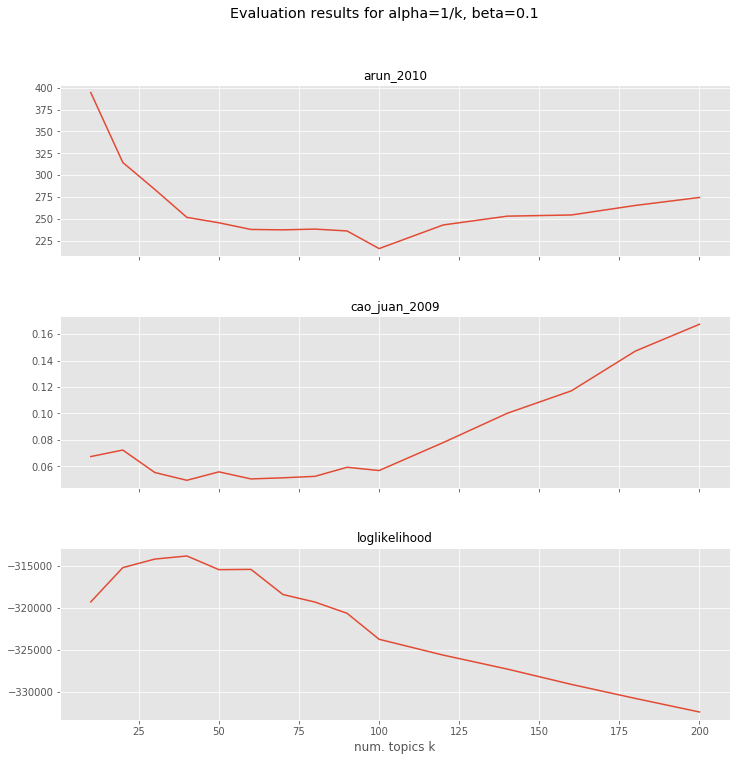

In [21]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [22]:
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
    

cao : 0.0494487260413666 	 40
arun: 216.33849967756962 	 100


### alpha: 0.1 beta: 1/(10*k)

In [23]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 20
INFO:lda:n_topics: 10
INFO:lda:n_words: 55386
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 50
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 70
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_topics: 60
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 80
INFO:lda:n_topics: 40
IN

INFO:lda:<30> log likelihood: -326557
INFO:lda:<10> log likelihood: -381180
INFO:lda:<70> log likelihood: -321636
INFO:lda:<20> log likelihood: -331715
INFO:lda:<20> log likelihood: -350519
INFO:lda:<40> log likelihood: -324095
INFO:lda:<10> log likelihood: -399819
INFO:lda:<80> log likelihood: -321164
INFO:lda:<30> log likelihood: -334470
INFO:lda:<30> log likelihood: -339081
INFO:lda:<20> log likelihood: -361526
INFO:lda:<90> log likelihood: -320445
INFO:lda:<20> log likelihood: -354666
INFO:lda:<50> log likelihood: -322563
INFO:lda:<30> log likelihood: -327414
INFO:lda:<10> log likelihood: -392226
INFO:lda:<100> log likelihood: -320196
INFO:lda:<20> log likelihood: -366015
INFO:lda:<30> log likelihood: -345528
INFO:lda:<40> log likelihood: -332153
INFO:lda:<60> log likelihood: -321333
INFO:lda:<110> log likelihood: -319761
INFO:lda:<40> log likelihood: -336716
INFO:lda:<10> log likelihood: -407537
INFO:lda:<40> log likelihood: -325136
INFO:lda:<120> log likelihood: -319752
INFO:lda:

INFO:lda:<510> log likelihood: -317922
INFO:lda:<250> log likelihood: -319023
INFO:lda:<90> log likelihood: -352640
INFO:lda:<160> log likelihood: -333481
INFO:lda:<350> log likelihood: -313341
INFO:lda:<50> log likelihood: -385970
INFO:lda:<520> log likelihood: -317726
INFO:lda:<190> log likelihood: -327195
INFO:lda:<120> log likelihood: -343852
INFO:lda:<60> log likelihood: -377549
INFO:lda:<360> log likelihood: -313396
INFO:lda:<260> log likelihood: -318793
INFO:lda:<530> log likelihood: -317698
INFO:lda:<140> log likelihood: -338766
INFO:lda:<70> log likelihood: -369603
INFO:lda:<80> log likelihood: -362920
INFO:lda:<220> log likelihood: -324097
INFO:lda:<110> log likelihood: -349129
INFO:lda:<540> log likelihood: -317889
INFO:lda:<370> log likelihood: -313362
INFO:lda:<170> log likelihood: -332895
INFO:lda:<200> log likelihood: -327048
INFO:lda:<550> log likelihood: -317721
INFO:lda:<270> log likelihood: -319292
INFO:lda:<50> log likelihood: -389967
INFO:lda:<380> log likelihood: 

INFO:lda:<490> log likelihood: -318392
INFO:lda:<220> log likelihood: -339976
INFO:lda:<940> log likelihood: -316925
INFO:lda:<650> log likelihood: -312759
INFO:lda:<250> log likelihood: -336449
INFO:lda:<110> log likelihood: -371929
INFO:lda:<150> log likelihood: -358609
INFO:lda:<200> log likelihood: -345084
INFO:lda:<950> log likelihood: -317056
INFO:lda:<500> log likelihood: -318865
INFO:lda:<400> log likelihood: -322900
INFO:lda:<660> log likelihood: -312988
INFO:lda:<960> log likelihood: -317074
INFO:lda:<350> log likelihood: -325446
INFO:lda:<300> log likelihood: -331291
INFO:lda:<180> log likelihood: -348029
INFO:lda:<970> log likelihood: -317121
INFO:lda:<90> log likelihood: -385380
INFO:lda:<670> log likelihood: -312910
INFO:lda:<510> log likelihood: -318528
INFO:lda:<410> log likelihood: -322779
INFO:lda:<980> log likelihood: -316970
INFO:lda:<260> log likelihood: -336174
INFO:lda:<230> log likelihood: -340192
INFO:lda:<210> log likelihood: -345180
INFO:lda:<680> log likelih

INFO:lda:<730> log likelihood: -318376
INFO:lda:<420> log likelihood: -330750
INFO:lda:<1380> log likelihood: -316872
INFO:lda:<950> log likelihood: -313095
INFO:lda:<160> log likelihood: -370251
INFO:lda:<1390> log likelihood: -317031
INFO:lda:<740> log likelihood: -318206
INFO:lda:<580> log likelihood: -322899
INFO:lda:<500> log likelihood: -325560
INFO:lda:<1400> log likelihood: -316940
INFO:lda:<300> log likelihood: -343286
INFO:lda:<960> log likelihood: -313023
INFO:lda:<430> log likelihood: -330912
INFO:lda:<1410> log likelihood: -316620
INFO:lda:<330> log likelihood: -338598
INFO:lda:<380> log likelihood: -335606
INFO:lda:<180> log likelihood: -363428
INFO:lda:<750> log likelihood: -318284
INFO:lda:<1420> log likelihood: -316969
INFO:lda:<970> log likelihood: -312908
INFO:lda:<590> log likelihood: -322256
INFO:lda:<510> log likelihood: -325328
INFO:lda:<140> log likelihood: -376743
INFO:lda:<1430> log likelihood: -317070
INFO:lda:<980> log likelihood: -312805
INFO:lda:<220> log 

INFO:lda:<480> log likelihood: -334973
INFO:lda:<1820> log likelihood: -316964
INFO:lda:<970> log likelihood: -318727
INFO:lda:<280> log likelihood: -355684
INFO:lda:<1830> log likelihood: -316961
INFO:lda:<1250> log likelihood: -312501
INFO:lda:<760> log likelihood: -322000
INFO:lda:<1840> log likelihood: -317025
INFO:lda:<980> log likelihood: -318493
INFO:lda:<650> log likelihood: -324693
INFO:lda:<180> log likelihood: -375155
INFO:lda:<560> log likelihood: -330126
INFO:lda:<430> log likelihood: -337790
INFO:lda:<1260> log likelihood: -312573
INFO:lda:<1850> log likelihood: -316762
INFO:lda:<770> log likelihood: -322045
INFO:lda:<990> log likelihood: -318236
INFO:lda:<1860> log likelihood: -316821
INFO:lda:<1270> log likelihood: -312801
INFO:lda:<400> log likelihood: -342324
INFO:lda:<490> log likelihood: -334688
INFO:lda:<1870> log likelihood: -316902
INFO:lda:<1280> log likelihood: -312683
INFO:lda:<240> log likelihood: -362039
INFO:lda:<1000> log likelihood: -318276
INFO:lda:<660>

INFO:lda:<420> log likelihood: -345353
INFO:lda:<1600> log likelihood: -312694
INFO:lda:<1220> log likelihood: -317963
INFO:lda:<700> log likelihood: -329974
INFO:lda:<820> log likelihood: -325226
INFO:lda:<540> log likelihood: -337222
INFO:lda:<230> log likelihood: -374020
INFO:lda:<1610> log likelihood: -312756
INFO:lda:<610> log likelihood: -333973
INFO:lda:<980> log likelihood: -322125
INFO:lda:<1230> log likelihood: -318226
INFO:lda:<1620> log likelihood: -312726
INFO:lda:<830> log likelihood: -325132
INFO:lda:<500> log likelihood: -342384
INFO:lda:<710> log likelihood: -329736
INFO:lda:<1630> log likelihood: -312552
INFO:lda:<1240> log likelihood: -318088
INFO:lda:<990> log likelihood: -322203
INFO:lda:<550> log likelihood: -337031
INFO:lda:<360> log likelihood: -354553
INFO:lda:<1640> log likelihood: -312620
INFO:lda:<430> log likelihood: -345689
INFO:lda:<1250> log likelihood: -317872
INFO:lda:<270> log likelihood: -367276
INFO:lda:<840> log likelihood: -325119
INFO:lda:<620> l

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.043905
INFO:lda:<750> log likelihood: -333152
INFO:lda:<430> log likelihood: -353746
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 286.224326
INFO:lda:<1520> log likelihood: -317940
INFO:lda:<1030> log likelihood: -324979
INFO:lda:<1200> log likelihood: -321872
INFO:lda:<610> log likelihood: -342163
INFO:lda:<660> log likelihood: -336579
INFO:lda:<330> log likelihood: -366511
INFO:lda:<1530> log likelihood: -318018
INFO:lda:<520> log likelihood: -344870
INFO:lda:<860> log likelihood: -329793
INFO:lda:<1040> log likelihood: -324732
INFO:lda:<1210> log likelihood: -321878
INFO:lda:<1540> log likelihood: -317986
INFO:lda:<760> log likelihood: -333574
INFO:lda:<1050> log likelihood: -324876
INFO:lda:<620> log likelihood: -342223
INFO:lda:<1550> log likelihood: -318104
INFO:lda:<870> log likelihood: -329476
INFO:lda:<670> log likelihood: -336595
INFO:lda:<1220> log likelihood: -321818
INFO:lda:<1560> log likelih

INFO:lda:<1470> log likelihood: -321945
INFO:lda:<1880> log likelihood: -317785
INFO:lda:<1260> log likelihood: -324345
INFO:lda:<300> log likelihood: -377485
INFO:lda:<1060> log likelihood: -329262
INFO:lda:<1480> log likelihood: -322468
INFO:lda:<930> log likelihood: -332930
INFO:lda:<1890> log likelihood: -317977
INFO:lda:<820> log likelihood: -336424
INFO:lda:<460> log likelihood: -358864
INFO:lda:<1270> log likelihood: -324258
INFO:lda:<750> log likelihood: -341019
INFO:lda:<1490> log likelihood: -321834
INFO:lda:<540> log likelihood: -352421
INFO:lda:<1900> log likelihood: -317623
INFO:lda:<1070> log likelihood: -329635
INFO:lda:<650> log likelihood: -344704
INFO:lda:<1280> log likelihood: -324499
INFO:lda:<1500> log likelihood: -322181
INFO:lda:<940> log likelihood: -332860
INFO:lda:<1910> log likelihood: -318029
INFO:lda:<830> log likelihood: -336485
INFO:lda:<350> log likelihood: -370664
INFO:lda:<410> log likelihood: -365189
INFO:lda:<1080> log likelihood: -329480
INFO:lda:<7

INFO:lda:<1520> log likelihood: -324416
INFO:lda:<1290> log likelihood: -329625
INFO:lda:<650> log likelihood: -352181
INFO:lda:<420> log likelihood: -369704
INFO:lda:<890> log likelihood: -340892
INFO:lda:<1000> log likelihood: -335853
INFO:lda:<1790> log likelihood: -322013
INFO:lda:<1530> log likelihood: -324052
INFO:lda:<1120> log likelihood: -332570
INFO:lda:<790> log likelihood: -344215
INFO:lda:<370> log likelihood: -375928
INFO:lda:<1300> log likelihood: -329477
INFO:lda:<1800> log likelihood: -322001
INFO:lda:<1540> log likelihood: -324224
INFO:lda:<490> log likelihood: -364738
INFO:lda:<900> log likelihood: -340649
INFO:lda:<1130> log likelihood: -332505
INFO:lda:<1310> log likelihood: -329802
INFO:lda:<560> log likelihood: -358052
INFO:lda:<1810> log likelihood: -322071
INFO:lda:<660> log likelihood: -351646
INFO:lda:<1550> log likelihood: -324183
INFO:lda:<1010> log likelihood: -336012
INFO:lda:<800> log likelihood: -343915
INFO:lda:<1820> log likelihood: -321931
INFO:lda:<

INFO:lda:<950> log likelihood: -343802
INFO:lda:<780> log likelihood: -351322
INFO:lda:<1350> log likelihood: -332022
INFO:lda:<1820> log likelihood: -323802
INFO:lda:<580> log likelihood: -364082
INFO:lda:<1060> log likelihood: -340985
INFO:lda:<1550> log likelihood: -329277
INFO:lda:<1190> log likelihood: -335977
INFO:lda:<660> log likelihood: -357286
INFO:lda:<960> log likelihood: -343841
INFO:lda:<1360> log likelihood: -331651
INFO:lda:<1830> log likelihood: -323661
INFO:lda:<1560> log likelihood: -329388
INFO:lda:<1070> log likelihood: -340668
INFO:lda:<1840> log likelihood: -323651
INFO:lda:<1200> log likelihood: -335883
INFO:lda:<790> log likelihood: -351300
INFO:lda:<510> log likelihood: -369356
INFO:lda:<1370> log likelihood: -331623
INFO:lda:<1570> log likelihood: -328985
INFO:lda:<1850> log likelihood: -323566
INFO:lda:<970> log likelihood: -343816
INFO:lda:<590> log likelihood: -363958
INFO:lda:<670> log likelihood: -357563
INFO:lda:<1080> log likelihood: -341122
INFO:lda:<

INFO:lda:<1620> log likelihood: -331226
INFO:lda:<1410> log likelihood: -335807
INFO:lda:<1270> log likelihood: -340636
INFO:lda:<1150> log likelihood: -343833
INFO:lda:<1850> log likelihood: -329181
INFO:lda:<540> log likelihood: -373921
INFO:lda:<610> log likelihood: -367984
INFO:lda:<1630> log likelihood: -331897
INFO:lda:<800> log likelihood: -357026
INFO:lda:<950> log likelihood: -350567
INFO:lda:<1860> log likelihood: -329378
INFO:lda:<1420> log likelihood: -335901
INFO:lda:<1280> log likelihood: -340533
INFO:lda:<1160> log likelihood: -343410
INFO:lda:<700> log likelihood: -363048
INFO:lda:<1640> log likelihood: -331938
INFO:lda:<1870> log likelihood: -329447
INFO:lda:<1430> log likelihood: -335902
INFO:lda:<960> log likelihood: -350219
INFO:lda:<1290> log likelihood: -340987
INFO:lda:<1650> log likelihood: -331863
INFO:lda:<1880> log likelihood: -329303
INFO:lda:<1170> log likelihood: -343263
INFO:lda:<620> log likelihood: -368140
INFO:lda:<810> log likelihood: -357122
INFO:lda

INFO:lda:<1520> log likelihood: -340186
INFO:lda:<1140> log likelihood: -350210
INFO:lda:<1380> log likelihood: -343395
INFO:lda:<1950> log likelihood: -331837
INFO:lda:<960> log likelihood: -356973
INFO:lda:<1710> log likelihood: -335378
INFO:lda:<1530> log likelihood: -340153
INFO:lda:<740> log likelihood: -367111
INFO:lda:<840> log likelihood: -362366
INFO:lda:<1960> log likelihood: -331903
INFO:lda:<1390> log likelihood: -343035
INFO:lda:<1150> log likelihood: -349843
INFO:lda:<660> log likelihood: -373036
INFO:lda:<1720> log likelihood: -335356
INFO:lda:<1540> log likelihood: -340146
INFO:lda:<970> log likelihood: -356706
INFO:lda:<1970> log likelihood: -331684
INFO:lda:<1400> log likelihood: -342872
INFO:lda:<1160> log likelihood: -349661
INFO:lda:<1730> log likelihood: -335364
INFO:lda:<1550> log likelihood: -340215
INFO:lda:<1980> log likelihood: -331750
INFO:lda:<850> log likelihood: -361782
INFO:lda:<750> log likelihood: -366953
INFO:lda:<1740> log likelihood: -334967
INFO:ld

INFO:lda:<1850> log likelihood: -340368
INFO:lda:<1680> log likelihood: -343416
INFO:lda:<1020> log likelihood: -361872
INFO:lda:<1400> log likelihood: -349662
INFO:lda:<1860> log likelihood: -340509
INFO:lda:<1690> log likelihood: -343092
INFO:lda:<900> log likelihood: -366580
INFO:lda:<1180> log likelihood: -356319
INFO:lda:<1870> log likelihood: -340285
INFO:lda:<1030> log likelihood: -361181
INFO:lda:<1410> log likelihood: -349601
INFO:lda:<800> log likelihood: -372734
INFO:lda:<1700> log likelihood: -342830
INFO:lda:<1880> log likelihood: -340412
INFO:lda:<1190> log likelihood: -356297
INFO:lda:<1420> log likelihood: -349777
INFO:lda:<910> log likelihood: -367740
INFO:lda:<1040> log likelihood: -361419
INFO:lda:<1890> log likelihood: -340629
INFO:lda:<1710> log likelihood: -343297
INFO:lda:<810> log likelihood: -372796
INFO:lda:<1900> log likelihood: -340495
INFO:lda:<1430> log likelihood: -350178
INFO:lda:<1200> log likelihood: -356095
INFO:lda:<1720> log likelihood: -343149
INFO

INFO:lda:<1500> log likelihood: -355816
INFO:lda:<1010> log likelihood: -371770
INFO:lda:<1310> log likelihood: -361211
INFO:lda:<1790> log likelihood: -349639
INFO:lda:<1150> log likelihood: -366281
INFO:lda:<1510> log likelihood: -356359
INFO:lda:<1800> log likelihood: -349040
INFO:lda:<1320> log likelihood: -360676
INFO:lda:<1020> log likelihood: -371684
INFO:lda:<1160> log likelihood: -366858
INFO:lda:<1520> log likelihood: -356324
INFO:lda:<1810> log likelihood: -349575
INFO:lda:<1330> log likelihood: -361429
INFO:lda:<1820> log likelihood: -349231
INFO:lda:<1030> log likelihood: -371542
INFO:lda:<1530> log likelihood: -355884
INFO:lda:<1170> log likelihood: -366652
INFO:lda:<1830> log likelihood: -349202
INFO:lda:<1340> log likelihood: -361579
INFO:lda:<1540> log likelihood: -355809
INFO:lda:<1840> log likelihood: -349239
INFO:lda:<1180> log likelihood: -366504
INFO:lda:<1040> log likelihood: -371218
INFO:lda:<1850> log likelihood: -349321
INFO:lda:<1350> log likelihood: -360892


INFO:lda:<1540> log likelihood: -365953
INFO:lda:<1770> log likelihood: -360840
INFO:lda:<1550> log likelihood: -365935
INFO:lda:<1370> log likelihood: -371224
INFO:lda:<1780> log likelihood: -360404
INFO:lda:<1560> log likelihood: -365659
INFO:lda:<1380> log likelihood: -371453
INFO:lda:<1790> log likelihood: -361440
INFO:lda:<1570> log likelihood: -365217
INFO:lda:<1390> log likelihood: -371030
INFO:lda:<1800> log likelihood: -360813
INFO:lda:<1580> log likelihood: -365993
INFO:lda:<1810> log likelihood: -360849
INFO:lda:<1400> log likelihood: -371161
INFO:lda:<1590> log likelihood: -366077
INFO:lda:<1820> log likelihood: -360625
INFO:lda:<1410> log likelihood: -371107
INFO:lda:<1600> log likelihood: -366106
INFO:lda:<1830> log likelihood: -360829
INFO:lda:<1420> log likelihood: -371545
INFO:lda:<1840> log likelihood: -361053
INFO:lda:<1610> log likelihood: -365493
INFO:lda:<1430> log likelihood: -371243
INFO:lda:<1850> log likelihood: -360452
INFO:lda:<1620> log likelihood: -365707


plotting evaluation results


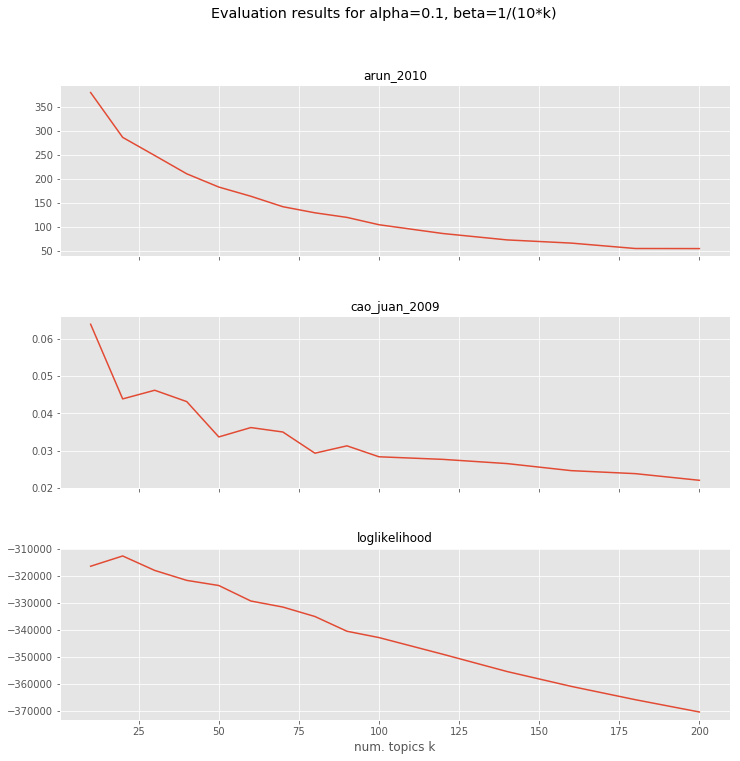

In [24]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 0.1 beta: 0.001

In [25]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 20
INFO:lda:n_topics: 30
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:n_topics: 10
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_topics: 50
INFO:lda:n_words: 55386
INFO:lda:n_topics: 40
INFO:lda:n_words: 55386
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 4582
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 70
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 60


INFO:lda:<30> log likelihood: -336997
INFO:lda:<10> log likelihood: -384116
INFO:lda:<60> log likelihood: -337350
INFO:lda:<40> log likelihood: -334744
INFO:lda:<70> log likelihood: -336698
INFO:lda:<20> log likelihood: -347826
INFO:lda:<20> log likelihood: -353352
INFO:lda:<10> log likelihood: -392296
INFO:lda:<40> log likelihood: -334664
INFO:lda:<50> log likelihood: -332814
INFO:lda:<80> log likelihood: -335830
INFO:lda:<30> log likelihood: -340053
INFO:lda:<20> log likelihood: -357518
INFO:lda:<90> log likelihood: -335273
INFO:lda:<60> log likelihood: -331979
INFO:lda:<20> log likelihood: -363821
INFO:lda:<100> log likelihood: -334913
INFO:lda:<50> log likelihood: -333163
INFO:lda:<10> log likelihood: -403046
INFO:lda:<10> log likelihood: -399045
INFO:lda:<30> log likelihood: -343294
INFO:lda:<40> log likelihood: -337834
INFO:lda:<110> log likelihood: -334400
INFO:lda:<70> log likelihood: -330602
INFO:lda:<20> log likelihood: -367582
INFO:lda:<20> log likelihood: -365308
INFO:lda:<

INFO:lda:<60> log likelihood: -367905
INFO:lda:<270> log likelihood: -323530
INFO:lda:<530> log likelihood: -328525
INFO:lda:<150> log likelihood: -336100
INFO:lda:<210> log likelihood: -328030
INFO:lda:<360> log likelihood: -321967
INFO:lda:<100> log likelihood: -350125
INFO:lda:<540> log likelihood: -328416
INFO:lda:<180> log likelihood: -331521
INFO:lda:<130> log likelihood: -341549
INFO:lda:<280> log likelihood: -323564
INFO:lda:<370> log likelihood: -321782
INFO:lda:<550> log likelihood: -328188
INFO:lda:<560> log likelihood: -328288
INFO:lda:<220> log likelihood: -328403
INFO:lda:<290> log likelihood: -323258
INFO:lda:<380> log likelihood: -321741
INFO:lda:<120> log likelihood: -346814
INFO:lda:<570> log likelihood: -328440
INFO:lda:<160> log likelihood: -335554
INFO:lda:<190> log likelihood: -331183
INFO:lda:<580> log likelihood: -328209
INFO:lda:<390> log likelihood: -321744
INFO:lda:<100> log likelihood: -351381
INFO:lda:<300> log likelihood: -323178
INFO:lda:<230> log likelih

INFO:lda:<80> log likelihood: -381991
INFO:lda:<510> log likelihood: -322169
INFO:lda:<240> log likelihood: -338677
INFO:lda:<280> log likelihood: -333064
INFO:lda:<340> log likelihood: -328447
INFO:lda:<670> log likelihood: -320530
INFO:lda:<990> log likelihood: -327377
INFO:lda:<400> log likelihood: -325874
INFO:lda:<1000> log likelihood: -327557
INFO:lda:<680> log likelihood: -320635
INFO:lda:<520> log likelihood: -322410
INFO:lda:<120> log likelihood: -363783
INFO:lda:<220> log likelihood: -343177
INFO:lda:<1010> log likelihood: -327629
INFO:lda:<690> log likelihood: -320348
INFO:lda:<290> log likelihood: -333060
INFO:lda:<350> log likelihood: -327980
INFO:lda:<410> log likelihood: -325753
INFO:lda:<1020> log likelihood: -327197
INFO:lda:<90> log likelihood: -374533
INFO:lda:<530> log likelihood: -322199
INFO:lda:<250> log likelihood: -338029
INFO:lda:<190> log likelihood: -345033
INFO:lda:<180> log likelihood: -348029
INFO:lda:<700> log likelihood: -320409
INFO:lda:<1030> log like

INFO:lda:<980> log likelihood: -319880
INFO:lda:<130> log likelihood: -372958
INFO:lda:<740> log likelihood: -321490
INFO:lda:<410> log likelihood: -332172
INFO:lda:<1440> log likelihood: -326588
INFO:lda:<990> log likelihood: -319879
INFO:lda:<1450> log likelihood: -326404
INFO:lda:<500> log likelihood: -328233
INFO:lda:<200> log likelihood: -355506
INFO:lda:<750> log likelihood: -321250
INFO:lda:<360> log likelihood: -336017
INFO:lda:<590> log likelihood: -324095
INFO:lda:<1460> log likelihood: -326495
INFO:lda:<320> log likelihood: -340885
INFO:lda:<270> log likelihood: -343506
INFO:lda:<1000> log likelihood: -319813
INFO:lda:<1470> log likelihood: -326471
INFO:lda:<420> log likelihood: -332053
INFO:lda:<760> log likelihood: -321291
INFO:lda:<1480> log likelihood: -326401
INFO:lda:<600> log likelihood: -324062
INFO:lda:<1010> log likelihood: -320010
INFO:lda:<510> log likelihood: -328303
INFO:lda:<1490> log likelihood: -326608
INFO:lda:<120> log likelihood: -379159
INFO:lda:<260> lo

INFO:lda:<1880> log likelihood: -326156
INFO:lda:<980> log likelihood: -321315
INFO:lda:<1890> log likelihood: -326142
INFO:lda:<770> log likelihood: -323498
INFO:lda:<1300> log likelihood: -319572
INFO:lda:<1900> log likelihood: -325949
INFO:lda:<470> log likelihood: -335610
INFO:lda:<990> log likelihood: -321050
INFO:lda:<330> log likelihood: -345933
INFO:lda:<1910> log likelihood: -325974
INFO:lda:<550> log likelihood: -331591
INFO:lda:<230> log likelihood: -360484
INFO:lda:<650> log likelihood: -327290
INFO:lda:<200> log likelihood: -363739
INFO:lda:<420> log likelihood: -339983
INFO:lda:<1310> log likelihood: -319703
INFO:lda:<1920> log likelihood: -326061
INFO:lda:<780> log likelihood: -323496
INFO:lda:<1000> log likelihood: -321069
INFO:lda:<1320> log likelihood: -319767
INFO:lda:<1930> log likelihood: -326173
INFO:lda:<360> log likelihood: -341592
INFO:lda:<480> log likelihood: -335430
INFO:lda:<1330> log likelihood: -319632
INFO:lda:<1940> log likelihood: -325924
INFO:lda:<560

INFO:lda:<1660> log likelihood: -319250
INFO:lda:<420> log likelihood: -345353
INFO:lda:<700> log likelihood: -330928
INFO:lda:<600> log likelihood: -334558
INFO:lda:<530> log likelihood: -339492
INFO:lda:<990> log likelihood: -323046
INFO:lda:<1260> log likelihood: -321333
INFO:lda:<340> log likelihood: -353008
INFO:lda:<1670> log likelihood: -319413
INFO:lda:<820> log likelihood: -327026
INFO:lda:<1270> log likelihood: -321129
INFO:lda:<1680> log likelihood: -319447
INFO:lda:<1000> log likelihood: -323098
INFO:lda:<460> log likelihood: -341374
INFO:lda:<710> log likelihood: -330656
INFO:lda:<200> log likelihood: -375808
INFO:lda:<1280> log likelihood: -321177
INFO:lda:<1690> log likelihood: -319269
INFO:lda:<610> log likelihood: -334852
INFO:lda:<830> log likelihood: -327380
INFO:lda:<540> log likelihood: -339477
INFO:lda:<1700> log likelihood: -319248
INFO:lda:<1010> log likelihood: -323150
INFO:lda:<1290> log likelihood: -321003
INFO:lda:<300> log likelihood: -358895
INFO:lda:<430>

INFO:lda:<360> log likelihood: -357827
INFO:lda:<740> log likelihood: -334211
INFO:lda:<860> log likelihood: -330565
INFO:lda:<1220> log likelihood: -322554
INFO:lda:<520> log likelihood: -344870
INFO:lda:<1560> log likelihood: -320731
INFO:lda:<1020> log likelihood: -327141
INFO:lda:<660> log likelihood: -338580
INFO:lda:<1570> log likelihood: -320673
INFO:lda:<1230> log likelihood: -322268
INFO:lda:<750> log likelihood: -334177
INFO:lda:<870> log likelihood: -330400
INFO:lda:<570> log likelihood: -340810
INFO:lda:<1030> log likelihood: -326673
INFO:lda:<430> log likelihood: -352399
INFO:lda:<1580> log likelihood: -320780
INFO:lda:<320> log likelihood: -362180
INFO:lda:<280> log likelihood: -368509
INFO:lda:<1240> log likelihood: -322684
INFO:lda:<670> log likelihood: -338252
INFO:lda:<530> log likelihood: -344559
INFO:lda:<250> log likelihood: -374564
INFO:lda:<1590> log likelihood: -320600
INFO:lda:<1040> log likelihood: -326917
INFO:lda:<880> log likelihood: -330334
INFO:lda:<760> 

INFO:lda:<1250> log likelihood: -326434
INFO:lda:<390> log likelihood: -362133
INFO:lda:<1500> log likelihood: -323146
INFO:lda:<1060> log likelihood: -330008
INFO:lda:<920> log likelihood: -333692
INFO:lda:<1930> log likelihood: -320801
INFO:lda:<450> log likelihood: -356723
INFO:lda:<530> log likelihood: -351062
INFO:lda:<820> log likelihood: -338368
INFO:lda:<1260> log likelihood: -326597
INFO:lda:<1510> log likelihood: -322792
INFO:lda:<1940> log likelihood: -320476
INFO:lda:<710> log likelihood: -340547
INFO:lda:<1070> log likelihood: -330137
INFO:lda:<1950> log likelihood: -320741
INFO:lda:<650> log likelihood: -344704
INFO:lda:<1520> log likelihood: -322824
INFO:lda:<930> log likelihood: -333964
INFO:lda:<1270> log likelihood: -326577
INFO:lda:<1960> log likelihood: -320768
INFO:lda:<1530> log likelihood: -322629
INFO:lda:<830> log likelihood: -338022
INFO:lda:<310> log likelihood: -373242
INFO:lda:<1280> log likelihood: -326713
INFO:lda:<720> log likelihood: -340540
INFO:lda:<1

INFO:lda:<860> log likelihood: -340369
INFO:lda:<1530> log likelihood: -326468
INFO:lda:<1830> log likelihood: -322735
INFO:lda:<370> log likelihood: -371879
INFO:lda:<550> log likelihood: -356324
INFO:lda:<1120> log likelihood: -333506
INFO:lda:<990> log likelihood: -338001
INFO:lda:<480> log likelihood: -361957
INFO:lda:<1290> log likelihood: -330151
INFO:lda:<1540> log likelihood: -326569
INFO:lda:<1840> log likelihood: -322555
INFO:lda:<650> log likelihood: -350533
INFO:lda:<420> log likelihood: -367240
INFO:lda:<790> log likelihood: -344215
INFO:lda:<870> log likelihood: -339928
INFO:lda:<1850> log likelihood: -322361
INFO:lda:<1130> log likelihood: -333486
INFO:lda:<1300> log likelihood: -329875
INFO:lda:<1550> log likelihood: -327025
INFO:lda:<1000> log likelihood: -337617
INFO:lda:<1860> log likelihood: -322935
INFO:lda:<1560> log likelihood: -326535
INFO:lda:<1310> log likelihood: -330071
INFO:lda:<560> log likelihood: -356446
INFO:lda:<800> log likelihood: -343915
INFO:lda:<1

INFO:lda:<1550> log likelihood: -329645
INFO:lda:<500> log likelihood: -367206
INFO:lda:<1040> log likelihood: -340246
INFO:lda:<780> log likelihood: -350752
INFO:lda:<1850> log likelihood: -326186
INFO:lda:<1350> log likelihood: -332747
INFO:lda:<1560> log likelihood: -329729
INFO:lda:<1190> log likelihood: -337759
INFO:lda:<660> log likelihood: -355986
INFO:lda:<450> log likelihood: -371962
INFO:lda:<940> log likelihood: -344115
INFO:lda:<1860> log likelihood: -326445
INFO:lda:<1570> log likelihood: -329429
INFO:lda:<580> log likelihood: -361674
INFO:lda:<1360> log likelihood: -333311
INFO:lda:<1050> log likelihood: -339783
INFO:lda:<1200> log likelihood: -337587
INFO:lda:<1870> log likelihood: -326367
INFO:lda:<1580> log likelihood: -329718
INFO:lda:<790> log likelihood: -350549
INFO:lda:<950> log likelihood: -343802
INFO:lda:<1370> log likelihood: -332883
INFO:lda:<510> log likelihood: -367588
INFO:lda:<1880> log likelihood: -326287
INFO:lda:<1060> log likelihood: -339293
INFO:lda:

INFO:lda:<1430> log likelihood: -337753
INFO:lda:<1620> log likelihood: -332586
INFO:lda:<600> log likelihood: -366770
INFO:lda:<790> log likelihood: -355612
INFO:lda:<540> log likelihood: -371962
INFO:lda:<1880> log likelihood: -329765
INFO:lda:<1130> log likelihood: -343349
INFO:lda:<940> log likelihood: -349706
INFO:lda:<1260> log likelihood: -339227
INFO:lda:<1630> log likelihood: -332944
INFO:lda:<1440> log likelihood: -337615
INFO:lda:<1890> log likelihood: -329757
INFO:lda:<1640> log likelihood: -333132
INFO:lda:<800> log likelihood: -355329
INFO:lda:<700> log likelihood: -361486
INFO:lda:<1450> log likelihood: -337670
INFO:lda:<1900> log likelihood: -329401
INFO:lda:<1270> log likelihood: -339689
INFO:lda:<1140> log likelihood: -343554
INFO:lda:<950> log likelihood: -349743
INFO:lda:<610> log likelihood: -366457
INFO:lda:<1650> log likelihood: -332797
INFO:lda:<1910> log likelihood: -329508
INFO:lda:<1460> log likelihood: -337430
INFO:lda:<550> log likelihood: -371761
INFO:lda:

INFO:lda:<1960> log likelihood: -332391
INFO:lda:<1360> log likelihood: -343195
INFO:lda:<1730> log likelihood: -337458
INFO:lda:<840> log likelihood: -361389
INFO:lda:<1130> log likelihood: -348901
INFO:lda:<1520> log likelihood: -339748
INFO:lda:<960> log likelihood: -355451
INFO:lda:<1970> log likelihood: -331864
INFO:lda:<1740> log likelihood: -337112
INFO:lda:<1370> log likelihood: -342932
INFO:lda:<1530> log likelihood: -339341
INFO:lda:<730> log likelihood: -365763
INFO:lda:<1980> log likelihood: -332253
INFO:lda:<1140> log likelihood: -349127
INFO:lda:<850> log likelihood: -361031
INFO:lda:<1750> log likelihood: -336874
INFO:lda:<970> log likelihood: -355071
INFO:lda:<1380> log likelihood: -343395
INFO:lda:<1990> log likelihood: -331864
INFO:lda:<660> log likelihood: -371101
INFO:lda:<1540> log likelihood: -339426
INFO:lda:<1760> log likelihood: -336973
INFO:lda:<1999> log likelihood: -332448
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -331864.477229
INFO:tm

INFO:lda:<1860> log likelihood: -339364
INFO:lda:<890> log likelihood: -366403
INFO:lda:<1030> log likelihood: -360905
INFO:lda:<1170> log likelihood: -355549
INFO:lda:<1870> log likelihood: -339490
INFO:lda:<1680> log likelihood: -343416
INFO:lda:<1390> log likelihood: -348254
INFO:lda:<800> log likelihood: -371023
INFO:lda:<1880> log likelihood: -339241
INFO:lda:<1040> log likelihood: -361105
INFO:lda:<1690> log likelihood: -343092
INFO:lda:<1180> log likelihood: -355856
INFO:lda:<900> log likelihood: -365794
INFO:lda:<1400> log likelihood: -348583
INFO:lda:<1890> log likelihood: -339313
INFO:lda:<1700> log likelihood: -342830
INFO:lda:<810> log likelihood: -371280
INFO:lda:<1190> log likelihood: -355469
INFO:lda:<1410> log likelihood: -348789
INFO:lda:<1050> log likelihood: -360354
INFO:lda:<1900> log likelihood: -338953
INFO:lda:<910> log likelihood: -366484
INFO:lda:<1710> log likelihood: -343297
INFO:lda:<1910> log likelihood: -339452
INFO:lda:<1420> log likelihood: -348890
INFO:

INFO:lda:<1500> log likelihood: -355223
INFO:lda:<1780> log likelihood: -348415
INFO:lda:<1140> log likelihood: -365898
INFO:lda:<1510> log likelihood: -355036
INFO:lda:<1310> log likelihood: -360472
INFO:lda:<1020> log likelihood: -370852
INFO:lda:<1790> log likelihood: -348705
INFO:lda:<1520> log likelihood: -355047
INFO:lda:<1320> log likelihood: -360305
INFO:lda:<1150> log likelihood: -365719
INFO:lda:<1800> log likelihood: -348359
INFO:lda:<1030> log likelihood: -370792
INFO:lda:<1810> log likelihood: -348210
INFO:lda:<1530> log likelihood: -354770
INFO:lda:<1330> log likelihood: -360745
INFO:lda:<1160> log likelihood: -365510
INFO:lda:<1820> log likelihood: -348581
INFO:lda:<1540> log likelihood: -355009
INFO:lda:<1040> log likelihood: -370645
INFO:lda:<1340> log likelihood: -360346
INFO:lda:<1830> log likelihood: -348500
INFO:lda:<1170> log likelihood: -365511
INFO:lda:<1550> log likelihood: -354742
INFO:lda:<1840> log likelihood: -348710
INFO:lda:<1350> log likelihood: -360391


INFO:lda:<1370> log likelihood: -370212
INFO:lda:<1760> log likelihood: -360282
INFO:lda:<1540> log likelihood: -365236
INFO:lda:<1380> log likelihood: -370140
INFO:lda:<1770> log likelihood: -360081
INFO:lda:<1550> log likelihood: -365464
INFO:lda:<1780> log likelihood: -359610
INFO:lda:<1390> log likelihood: -369903
INFO:lda:<1560> log likelihood: -365081
INFO:lda:<1790> log likelihood: -360137
INFO:lda:<1400> log likelihood: -369752
INFO:lda:<1570> log likelihood: -365004
INFO:lda:<1800> log likelihood: -359497
INFO:lda:<1810> log likelihood: -360030
INFO:lda:<1410> log likelihood: -370169
INFO:lda:<1580> log likelihood: -364981
INFO:lda:<1820> log likelihood: -360207
INFO:lda:<1420> log likelihood: -369920
INFO:lda:<1590> log likelihood: -365366
INFO:lda:<1830> log likelihood: -360162
INFO:lda:<1600> log likelihood: -365287
INFO:lda:<1430> log likelihood: -370729
INFO:lda:<1840> log likelihood: -360229
INFO:lda:<1850> log likelihood: -360085
INFO:lda:<1610> log likelihood: -365151


plotting evaluation results


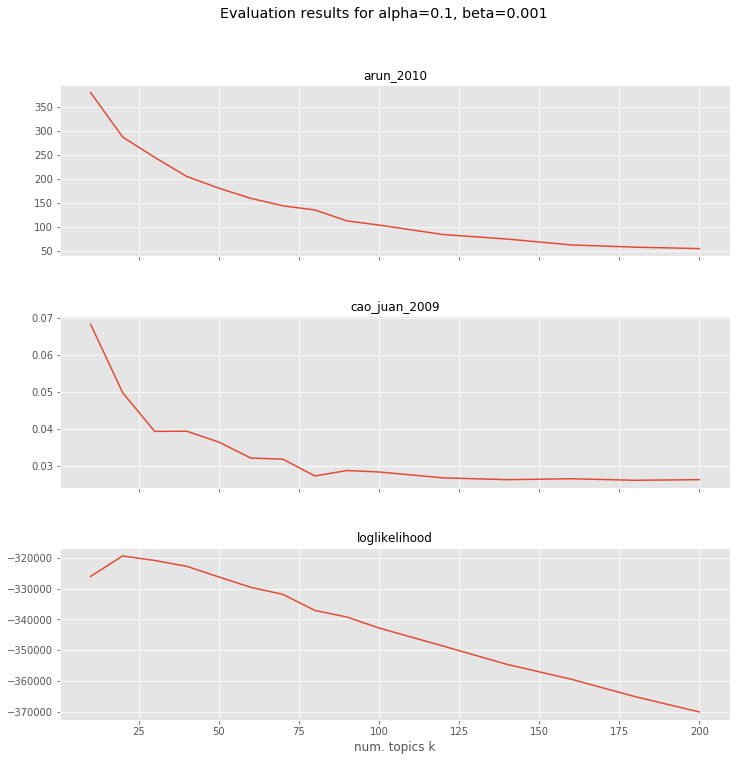

In [26]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 1/k beta: 1/(10*k)

In [27]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 10
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_documents: 10333
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_iter: 2000
INFO:lda:n_words: 55386
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:n_topics: 20
INFO:lda:n_documents: 10333
INFO:lda:n_topics: 40
INFO:lda:vocab_size: 4582
INFO:lda:n_words: 55386
INFO:lda:n_topics: 30
INFO:lda:n_documents: 10333
INFO:lda:n_words: 55386
INFO:lda:n_topics: 60
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 70
INFO:lda:n_words: 55386
INFO:lda:vocab_size: 4582
INFO:lda:vocab_size: 4582
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 1033

INFO:lda:<10> log likelihood: -358760
INFO:lda:<60> log likelihood: -322197
INFO:lda:<40> log likelihood: -314664
INFO:lda:<30> log likelihood: -316700
INFO:lda:<20> log likelihood: -328989
INFO:lda:<30> log likelihood: -320223
INFO:lda:<70> log likelihood: -321636
INFO:lda:<20> log likelihood: -327706
INFO:lda:<50> log likelihood: -312913
INFO:lda:<80> log likelihood: -321164
INFO:lda:<20> log likelihood: -331883
INFO:lda:<10> log likelihood: -361163
INFO:lda:<40> log likelihood: -312783
INFO:lda:<60> log likelihood: -311882
INFO:lda:<20> log likelihood: -328067
INFO:lda:<40> log likelihood: -314044
INFO:lda:<90> log likelihood: -320445
INFO:lda:<10> log likelihood: -358520
INFO:lda:<30> log likelihood: -319707
INFO:lda:<20> log likelihood: -330408
INFO:lda:<70> log likelihood: -310845
INFO:lda:<100> log likelihood: -320196
INFO:lda:<20> log likelihood: -331750
INFO:lda:<50> log likelihood: -309554
INFO:lda:<10> log likelihood: -363348
INFO:lda:<30> log likelihood: -318926
INFO:lda:<1

INFO:lda:<60> log likelihood: -306911
INFO:lda:<510> log likelihood: -317922
INFO:lda:<220> log likelihood: -299685
INFO:lda:<360> log likelihood: -305891
INFO:lda:<260> log likelihood: -302194
INFO:lda:<50> log likelihood: -311996
INFO:lda:<520> log likelihood: -317726
INFO:lda:<150> log likelihood: -299488
INFO:lda:<180> log likelihood: -300823
INFO:lda:<120> log likelihood: -301411
INFO:lda:<100> log likelihood: -301653
INFO:lda:<110> log likelihood: -302381
INFO:lda:<530> log likelihood: -317698
INFO:lda:<140> log likelihood: -299482
INFO:lda:<80> log likelihood: -304668
INFO:lda:<370> log likelihood: -306105
INFO:lda:<230> log likelihood: -299713
INFO:lda:<270> log likelihood: -302086
INFO:lda:<540> log likelihood: -317889
INFO:lda:<380> log likelihood: -306290
INFO:lda:<550> log likelihood: -317721
INFO:lda:<160> log likelihood: -299443
INFO:lda:<190> log likelihood: -300943
INFO:lda:<280> log likelihood: -301750
INFO:lda:<240> log likelihood: -299386
INFO:lda:<560> log likelihoo

INFO:lda:<250> log likelihood: -296551
INFO:lda:<80> log likelihood: -306826
INFO:lda:<650> log likelihood: -304901
INFO:lda:<960> log likelihood: -317074
INFO:lda:<120> log likelihood: -299272
INFO:lda:<500> log likelihood: -300927
INFO:lda:<410> log likelihood: -298083
INFO:lda:<970> log likelihood: -317121
INFO:lda:<340> log likelihood: -298112
INFO:lda:<660> log likelihood: -305107
INFO:lda:<200> log likelihood: -298566
INFO:lda:<220> log likelihood: -298144
INFO:lda:<980> log likelihood: -316970
INFO:lda:<290> log likelihood: -296975
INFO:lda:<180> log likelihood: -296491
INFO:lda:<510> log likelihood: -300627
INFO:lda:<260> log likelihood: -296330
INFO:lda:<990> log likelihood: -316918
INFO:lda:<670> log likelihood: -304914
INFO:lda:<420> log likelihood: -298135
INFO:lda:<150> log likelihood: -298645
INFO:lda:<350> log likelihood: -298042
INFO:lda:<1000> log likelihood: -316910
INFO:lda:<680> log likelihood: -305204
INFO:lda:<520> log likelihood: -300818
INFO:lda:<1010> log likel

INFO:lda:<180> log likelihood: -296090
INFO:lda:<730> log likelihood: -300194
INFO:lda:<1400> log likelihood: -316940
INFO:lda:<960> log likelihood: -305018
INFO:lda:<590> log likelihood: -297521
INFO:lda:<1410> log likelihood: -316620
INFO:lda:<420> log likelihood: -296092
INFO:lda:<320> log likelihood: -296421
INFO:lda:<500> log likelihood: -297316
INFO:lda:<970> log likelihood: -304691
INFO:lda:<290> log likelihood: -295900
INFO:lda:<740> log likelihood: -300379
INFO:lda:<370> log likelihood: -295199
INFO:lda:<1420> log likelihood: -316969
INFO:lda:<600> log likelihood: -297032
INFO:lda:<260> log likelihood: -294717
INFO:lda:<980> log likelihood: -304679
INFO:lda:<1430> log likelihood: -317070
INFO:lda:<750> log likelihood: -300576
INFO:lda:<120> log likelihood: -302592
INFO:lda:<220> log likelihood: -294919
INFO:lda:<510> log likelihood: -297241
INFO:lda:<1440> log likelihood: -317251
INFO:lda:<610> log likelihood: -297377
INFO:lda:<990> log likelihood: -304494
INFO:lda:<430> log l

INFO:lda:<1840> log likelihood: -317025
INFO:lda:<960> log likelihood: -300416
INFO:lda:<1850> log likelihood: -316762
INFO:lda:<370> log likelihood: -294706
INFO:lda:<1280> log likelihood: -304613
INFO:lda:<660> log likelihood: -296144
INFO:lda:<560> log likelihood: -294996
INFO:lda:<200> log likelihood: -297912
INFO:lda:<970> log likelihood: -300589
INFO:lda:<1860> log likelihood: -316821
INFO:lda:<780> log likelihood: -296757
INFO:lda:<280> log likelihood: -293573
INFO:lda:<480> log likelihood: -294659
INFO:lda:<1290> log likelihood: -304401
INFO:lda:<420> log likelihood: -295694
INFO:lda:<1870> log likelihood: -316902
INFO:lda:<980> log likelihood: -300465
INFO:lda:<180> log likelihood: -298953
INFO:lda:<1880> log likelihood: -316564
INFO:lda:<670> log likelihood: -296144
INFO:lda:<1300> log likelihood: -304334
INFO:lda:<240> log likelihood: -294623
INFO:lda:<790> log likelihood: -297067
INFO:lda:<570> log likelihood: -295411
INFO:lda:<1890> log likelihood: -316701
INFO:lda:<340> l

INFO:lda:<600> log likelihood: -294419
INFO:lda:<470> log likelihood: -294091
INFO:lda:<1240> log likelihood: -299883
INFO:lda:<420> log likelihood: -292615
INFO:lda:<840> log likelihood: -295598
INFO:lda:<980> log likelihood: -296657
INFO:lda:<1630> log likelihood: -303944
INFO:lda:<710> log likelihood: -294156
INFO:lda:<530> log likelihood: -294315
INFO:lda:<1250> log likelihood: -300034
INFO:lda:<1640> log likelihood: -303719
INFO:lda:<300> log likelihood: -293859
INFO:lda:<990> log likelihood: -296622
INFO:lda:<850> log likelihood: -295782
INFO:lda:<1650> log likelihood: -303668
INFO:lda:<200> log likelihood: -297743
INFO:lda:<610> log likelihood: -294393
INFO:lda:<1260> log likelihood: -300041
INFO:lda:<360> log likelihood: -292826
INFO:lda:<720> log likelihood: -294158
INFO:lda:<1660> log likelihood: -303765
INFO:lda:<480> log likelihood: -293865
INFO:lda:<1000> log likelihood: -296650
INFO:lda:<430> log likelihood: -292184
INFO:lda:<230> log likelihood: -298050
INFO:lda:<1270> l

INFO:lda:<1200> log likelihood: -296347
INFO:lda:<1030> log likelihood: -295665
INFO:lda:<650> log likelihood: -293920
INFO:lda:<580> log likelihood: -293469
INFO:lda:<1530> log likelihood: -300152
INFO:lda:<740> log likelihood: -293533
INFO:lda:<1210> log likelihood: -296424
INFO:lda:<520> log likelihood: -291703
INFO:lda:<1040> log likelihood: -295534
INFO:lda:<880> log likelihood: -293991
INFO:lda:<1540> log likelihood: -299977
INFO:lda:<440> log likelihood: -292387
INFO:lda:<280> log likelihood: -296803
INFO:lda:<370> log likelihood: -293074
INFO:lda:<1220> log likelihood: -296757
INFO:lda:<1550> log likelihood: -300128
INFO:lda:<750> log likelihood: -293419
INFO:lda:<590> log likelihood: -293033
INFO:lda:<660> log likelihood: -293941
INFO:lda:<1050> log likelihood: -295651
INFO:lda:<890> log likelihood: -294083
INFO:lda:<320> log likelihood: -294223
INFO:lda:<1230> log likelihood: -296551
INFO:lda:<1560> log likelihood: -299956
INFO:lda:<250> log likelihood: -296100
INFO:lda:<1060

INFO:lda:<800> log likelihood: -293130
INFO:lda:<1270> log likelihood: -295339
INFO:lda:<640> log likelihood: -291347
INFO:lda:<1890> log likelihood: -300039
INFO:lda:<1500> log likelihood: -296530
INFO:lda:<540> log likelihood: -291524
INFO:lda:<1080> log likelihood: -294183
INFO:lda:<720> log likelihood: -292680
INFO:lda:<1280> log likelihood: -295114
INFO:lda:<1900> log likelihood: -300096
INFO:lda:<920> log likelihood: -293248
INFO:lda:<1510> log likelihood: -296669
INFO:lda:<810> log likelihood: -293244
INFO:lda:<390> log likelihood: -293398
INFO:lda:<1910> log likelihood: -300103
INFO:lda:<1090> log likelihood: -294024
INFO:lda:<1290> log likelihood: -295202
INFO:lda:<1520> log likelihood: -296339
INFO:lda:<460> log likelihood: -291906
INFO:lda:<1920> log likelihood: -299986
INFO:lda:<650> log likelihood: -291221
INFO:lda:<930> log likelihood: -293527
INFO:lda:<350> log likelihood: -294832
INFO:lda:<820> log likelihood: -293314
INFO:lda:<730> log likelihood: -292432
INFO:lda:<193

INFO:lda:<1110> log likelihood: -292790
INFO:lda:<980> log likelihood: -292705
INFO:lda:<650> log likelihood: -291164
INFO:lda:<1820> log likelihood: -296390
INFO:lda:<1540> log likelihood: -294810
INFO:lda:<470> log likelihood: -292268
INFO:lda:<870> log likelihood: -291828
INFO:lda:<1310> log likelihood: -293491
INFO:lda:<420> log likelihood: -294334
INFO:lda:<780> log likelihood: -290857
INFO:lda:<1830> log likelihood: -296835
INFO:lda:<1550> log likelihood: -294924
INFO:lda:<1120> log likelihood: -293115
INFO:lda:<370> log likelihood: -293800
INFO:lda:<990> log likelihood: -292766
INFO:lda:<1320> log likelihood: -293363
INFO:lda:<1840> log likelihood: -296506
INFO:lda:<1560> log likelihood: -294953
INFO:lda:<560> log likelihood: -291473
INFO:lda:<660> log likelihood: -291122
INFO:lda:<880> log likelihood: -292032
INFO:lda:<1130> log likelihood: -293048
INFO:lda:<1850> log likelihood: -296379
INFO:lda:<790> log likelihood: -291160
INFO:lda:<1330> log likelihood: -293528
INFO:lda:<10

INFO:lda:<500> log likelihood: -292851
INFO:lda:<1840> log likelihood: -294271
INFO:lda:<930> log likelihood: -291049
INFO:lda:<1180> log likelihood: -292538
INFO:lda:<1570> log likelihood: -293139
INFO:lda:<1340> log likelihood: -292725
INFO:lda:<1850> log likelihood: -293882
INFO:lda:<1050> log likelihood: -291386
INFO:lda:<570> log likelihood: -292298
INFO:lda:<1580> log likelihood: -293148
INFO:lda:<1190> log likelihood: -292657
INFO:lda:<1350> log likelihood: -292361
INFO:lda:<790> log likelihood: -290785
INFO:lda:<1860> log likelihood: -293948
INFO:lda:<940> log likelihood: -291163
INFO:lda:<670> log likelihood: -290794
INFO:lda:<1590> log likelihood: -293088
INFO:lda:<1870> log likelihood: -294434
INFO:lda:<1200> log likelihood: -292143
INFO:lda:<1060> log likelihood: -291138
INFO:lda:<1360> log likelihood: -292864
INFO:lda:<510> log likelihood: -292781
INFO:lda:<450> log likelihood: -292990
INFO:lda:<1880> log likelihood: -294073
INFO:lda:<1600> log likelihood: -293141
INFO:lda

INFO:lda:<1120> log likelihood: -290407
INFO:lda:<530> log likelihood: -292561
INFO:lda:<940> log likelihood: -290716
INFO:lda:<1890> log likelihood: -292555
INFO:lda:<1430> log likelihood: -292076
INFO:lda:<1260> log likelihood: -291538
INFO:lda:<1620> log likelihood: -292503
INFO:lda:<800> log likelihood: -289707
INFO:lda:<1900> log likelihood: -292575
INFO:lda:<1130> log likelihood: -290436
INFO:lda:<1910> log likelihood: -292429
INFO:lda:<1630> log likelihood: -292292
INFO:lda:<1440> log likelihood: -292617
INFO:lda:<950> log likelihood: -290651
INFO:lda:<1270> log likelihood: -291440
INFO:lda:<690> log likelihood: -291401
INFO:lda:<1920> log likelihood: -292845
INFO:lda:<610> log likelihood: -292000
INFO:lda:<1640> log likelihood: -292952
INFO:lda:<1140> log likelihood: -290918
INFO:lda:<810> log likelihood: -289874
INFO:lda:<1450> log likelihood: -292249
INFO:lda:<540> log likelihood: -292040
INFO:lda:<1930> log likelihood: -292824
INFO:lda:<1280> log likelihood: -291588
INFO:lda

INFO:lda:<1950> log likelihood: -292158
INFO:lda:<1360> log likelihood: -290580
INFO:lda:<830> log likelihood: -291207
INFO:lda:<1530> log likelihood: -291099
INFO:lda:<730> log likelihood: -291293
INFO:lda:<1960> log likelihood: -292553
INFO:lda:<1730> log likelihood: -291994
INFO:lda:<970> log likelihood: -289478
INFO:lda:<1140> log likelihood: -290319
INFO:lda:<1370> log likelihood: -290292
INFO:lda:<1540> log likelihood: -291045
INFO:lda:<650> log likelihood: -290755
INFO:lda:<1970> log likelihood: -292082
INFO:lda:<1740> log likelihood: -292045
INFO:lda:<840> log likelihood: -290819
INFO:lda:<1550> log likelihood: -291278
INFO:lda:<1980> log likelihood: -292541
INFO:lda:<1380> log likelihood: -289912
INFO:lda:<980> log likelihood: -289345
INFO:lda:<1150> log likelihood: -290399
INFO:lda:<740> log likelihood: -291169
INFO:lda:<1750> log likelihood: -291993
INFO:lda:<1990> log likelihood: -292455
INFO:lda:<1390> log likelihood: -290069
INFO:lda:<1560> log likelihood: -290898
INFO:ld

INFO:lda:<890> log likelihood: -290796
INFO:lda:<1680> log likelihood: -290064
INFO:lda:<790> log likelihood: -290068
INFO:lda:<1870> log likelihood: -291449
INFO:lda:<1020> log likelihood: -290483
INFO:lda:<1390> log likelihood: -290249
INFO:lda:<1180> log likelihood: -289366
INFO:lda:<1690> log likelihood: -289873
INFO:lda:<1880> log likelihood: -291349
INFO:lda:<900> log likelihood: -290803
INFO:lda:<1030> log likelihood: -290308
INFO:lda:<1400> log likelihood: -290179
INFO:lda:<1700> log likelihood: -289764
INFO:lda:<1890> log likelihood: -290996
INFO:lda:<1190> log likelihood: -288960
INFO:lda:<800> log likelihood: -289795
INFO:lda:<1710> log likelihood: -289783
INFO:lda:<1900> log likelihood: -290871
INFO:lda:<1410> log likelihood: -289788
INFO:lda:<1040> log likelihood: -290444
INFO:lda:<910> log likelihood: -290545
INFO:lda:<1200> log likelihood: -288826
INFO:lda:<1910> log likelihood: -290629
INFO:lda:<1720> log likelihood: -290150
INFO:lda:<1420> log likelihood: -289959
INFO:

INFO:lda:<1300> log likelihood: -289915
INFO:lda:<1770> log likelihood: -290175
INFO:lda:<1510> log likelihood: -288581
INFO:lda:<1150> log likelihood: -289933
INFO:lda:<1020> log likelihood: -290163
INFO:lda:<1780> log likelihood: -289976
INFO:lda:<1310> log likelihood: -289888
INFO:lda:<1520> log likelihood: -288487
INFO:lda:<1790> log likelihood: -290204
INFO:lda:<1160> log likelihood: -290284
INFO:lda:<1320> log likelihood: -289519
INFO:lda:<1030> log likelihood: -289766
INFO:lda:<1530> log likelihood: -288335
INFO:lda:<1800> log likelihood: -290191
INFO:lda:<1540> log likelihood: -288370
INFO:lda:<1330> log likelihood: -289684
INFO:lda:<1170> log likelihood: -289843
INFO:lda:<1810> log likelihood: -290001
INFO:lda:<1040> log likelihood: -289989
INFO:lda:<1550> log likelihood: -288612
INFO:lda:<1340> log likelihood: -289618
INFO:lda:<1820> log likelihood: -290088
INFO:lda:<1180> log likelihood: -289949
INFO:lda:<1050> log likelihood: -289695
INFO:lda:<1560> log likelihood: -288413


INFO:lda:<1750> log likelihood: -288814
INFO:lda:<1370> log likelihood: -288860
INFO:lda:<1760> log likelihood: -289159
INFO:lda:<1550> log likelihood: -289346
INFO:lda:<1380> log likelihood: -289177
INFO:lda:<1770> log likelihood: -288994
INFO:lda:<1560> log likelihood: -289574
INFO:lda:<1390> log likelihood: -289277
INFO:lda:<1780> log likelihood: -289116
INFO:lda:<1570> log likelihood: -289415
INFO:lda:<1790> log likelihood: -289372
INFO:lda:<1400> log likelihood: -289243
INFO:lda:<1580> log likelihood: -289660
INFO:lda:<1800> log likelihood: -289334
INFO:lda:<1590> log likelihood: -289558
INFO:lda:<1410> log likelihood: -288986
INFO:lda:<1810> log likelihood: -289487
INFO:lda:<1600> log likelihood: -289553
INFO:lda:<1420> log likelihood: -288986
INFO:lda:<1820> log likelihood: -289024
INFO:lda:<1610> log likelihood: -289697
INFO:lda:<1430> log likelihood: -289104
INFO:lda:<1830> log likelihood: -289286
INFO:lda:<1620> log likelihood: -289334
INFO:lda:<1840> log likelihood: -289184


plotting evaluation results


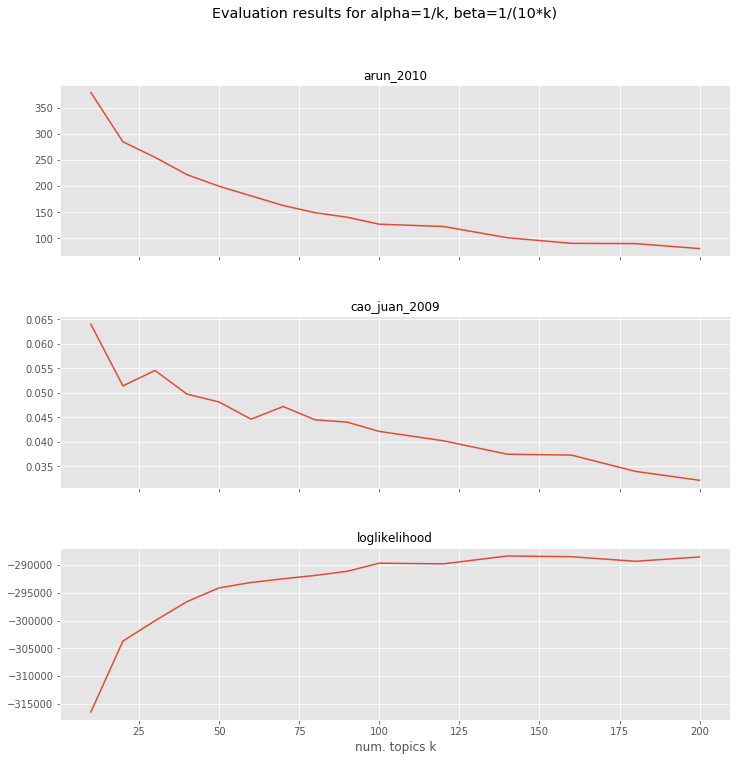

In [28]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA
### topics: 60 / alpha: 1/k / beta: 0.1

In [34]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=60, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=1/60, eta=0.1)

In [35]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')
(1, '0.019*"nascem" + 0.017*"bebes" + 0.013*"dois" + 0.011*"suspeita" + 0.010*"mosquitos"')
(2, '0.018*"pouco" + 0.018*"recebem" + 0.014*"kkkkk" + 0.014*"bebês" + 0.012*"óculos"')
(3, '0.019*"maioria" + 0.018*"política" + 0.014*"brasileiros" + 0.013*"vacinas" + 0.013*"crise"')
(4, '0.037*"primeira" + 0.015*"brasileira" + 0.014*"modelo" + 0.013*"mundo" + 0.009*"pode"')
(5, '0.135*"caso" + 0.092*"zika" + 0.061*"primeiro" + 0.024*"bebê" + 0.022*"vírus"')
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')
(7, '0.026*"gente" + 0.015*"nascidos" + 0.015*"recém" + 0.015*"dessa" + 0.014*"piada"')
(8, '0.061*"acho" + 0.035*"cérebro" + 0.023*"problema" + 0.015*"ainda" + 0.013*"pode"')
(9, '0.021*"acha" + 0.009*"doença" + 0.009*"pessoal" + 0.008*"agora" + 0.007*"atendimentos"')
(10, '0.036*"mutirão" + 0.027*"crianças" + 0.021*"hospital" + 0.019*"parecendo" + 0.010*"difi

In [36]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 21):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')

meu isso de microcefalia me dá uma dor


"SOCORRO!!! Zika, microcefalia, dengue, inflação, desemprego, desajuste fiscal, juros altos, alta de impostos,... https://t.co/kkYwU14HH9


https://t.co/T2Oh55tpYj   Vacina contra a Gripe Suína é a Verdadeira Causadora da        Microcefalia. Cuidado com as Vacinas. Veja Vídeo


https://t.co/eY3CmtYxXG Algo me diz que esse pedido do MPF/MG tem a ver com o surto de microcefalia. Só acho.


Mais dois mitos sobre zika e microcefalia: vacina HPV e haitianos: https://t.co/KO0b4OATnz #twitciencia


Vocês preferem ver uma criança sofrer e padecer de dor do que legalizar o aborto em casos como esse de microcefalia?


@Denise_apm @ClubeAntiPT 
No caso dessa vacinação nas gestantes, não significa que 100% das vacinadas terão feto com microcefalia.


@senhoritaelza https://t.co/7uAsZpvNyh tem outros sites tbm, jogando 'microcefalia vacina rubeola' no gugou temo

Mais de 3k de grávidas na Colômbia diagnosticadas com zika vírus: nenhum bebê com microcefalia. 

E o medo de tomar as vacina?




-----------


topico: 6
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')

#Zika #Microcefalia OMS alerta: é mais seguro não engravidar.https://t.co/82ko6Lb7SX #SaúdePública #Dengue #Epidemia https://t.co/8lEo5VXdkK


Município de São Bento em alerta contra Zica, Dengue e Microcefalia https://t.co/AJbrxpiHno https://t.co/XOSFbSuk6U


@Nubobot42 microcefalia quando nenhuma grávida toma vacina contra rubéola durante a gravidez)


@jornalnacional Enquanto tratam de dengue e microcefalia, os comunistas das FFAA estão ganhando terreno e angariando a simpatia do Militares


SUS ABANDONADO E ROUBADO PELO @ptbrasil
#TEMPORÃO
#HUMBERTOCOSTA
#PADILHA
A DENGUE EXPLODIU!
VEIO O #ZIKA A #MICROCEFALIAdoPT  #OsFILHOSdoPT


@folha Nunca vi uma Mãe infectada com Dengue gerar uma criança com problemas mais graves que uma Microcefa

UMA PERGUNTINHA @_mariadorosario  

EM QUE GOVERNO MESMO OS CASOS DE DENGUE E MICROCEFALIA AUMENTARAM?

 https://t.co/PALczHe4Pb




-----------


topico: 12
(12, '0.025*"tema" + 0.014*"tava" + 0.013*"fico" + 0.010*"redação" + 0.008*"estadual"')

perdi um irmão vítima de microcefalia, não consigo imaginar a dor dos meus pais em ver essa reportagem do Fantástico :'(


AO VIVO: Secretário do @minsaude fala dos três eixos ao combate à #dengue e #microcefalia https://t.co/SHC5BZJ3Oi


Microcefalia assusta mais que câncer e aids, reconhece secretário estadual da Saúde
@samuelvettori @RdGuaibaOficial


@WillianMar ppr isso q eu so pego gente com microcefalia


Lara estevos parabéns você é a microcefalia


Campanha da Fraternidade 2016, esse é o tema do #CaminhoscomPeJuarez , ás 22h, tudo sobre a  polêmica do aborto  com ref. a microcefalia.


R7 Mãe de gêmeos em que um tem microcefalia diz: "Tem dia que fico pensando por que um teve e outro não" R7 Lucas e… https://t.co/cOWb3t9AWC


508 caso

@VEJA Justo no momento que o Brasil está enfrentando uma epidemia de dengue, zika vírus e microcefalia? Alô MPF, tomem providências!


@samantapersotti @ro_vanja @JorgeXiada O Dr. Plínio diz que casos de microcefalia correspondem com vacinação de grávidas e mulheres férteis.


Rotas de entrada do ... - https://t.co/pCfyU5IAao  #biologia #zika #nomeiodaterra #dengue #microcefalia #olimpiadas https://t.co/xgc6RbSepe


Alguém já leu isso? Microcefalia devido a vírus da copa 2014 ou vacina da copa 2014?... https://t.co/obRBNQ5VPe


#OMS prevê testes de #vacina #antizika no mínimo em 18 meses https://t.co/qRpntpe9Bz #mosquito #Aedesaegypti #doença #saúde #microcefalia




-----------


topico: 18
(18, '0.096*"filho" + 0.023*"ajuda" + 0.017*"abortar" + 0.016*"cuidar" + 0.015*"criança"')

@Aetano foda! Aids, microcefalia, inflação alta...


Tava vendo bem estar e as criancas com microcefalia, meu é muito triste ver um bebê assim, já é ruim ver criança com gripe imagina


Tô com medo de pesqui